### 가설1: 간편결제/페이 이용증가와 고객 디지털 소비 전환 및 세그먼트의 변화
- 간편 결제/페이 이용이 고객의 소비패턴을 온라인 중심으로 변화시키고, 이러한 디지털 전환이 특정 고객 세그먼트에서 두드러지게 나타나는 지 분석

In [19]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats


#### 01_데이터구성

In [20]:
data = pd.read_parquet('data/가설검정.parquet')
print(data.columns.to_list())
data.head()

['ID', 'Segment', '남녀구분코드', '연령', '거주시도명', '기준년월', '이용금액_페이_온라인_B0M', '이용금액_페이_오프라인_B0M', '이용건수_페이_온라인_B0M', '이용건수_페이_오프라인_B0M', '이용금액_페이_온라인_R3M', '이용금액_페이_오프라인_R3M', '이용건수_페이_온라인_R3M', '이용건수_페이_오프라인_R3M', '이용금액_일시불_B0M', '이용건수_신용_B0M', '이용금액_체크_B0M', '이용금액_일시불_R6M', '이용건수_신용_R6M', '이용개월수_신용_R6M', '이용금액_온라인_B0M', '이용금액_오프라인_B0M', '쇼핑_온라인_이용금액', '카드론이용금액_누적', '이용횟수_연체_R6M', '평잔_일시불_6M', '잔액_일시불_B0M', '잔액_할부_B0M', '평잔_할부_6M']


,ID,Segment,남녀구분코드,연령,거주시도명,기준년월,이용금액_페이_온라인_B0M,이용금액_페이_오프라인_B0M,이용건수_페이_온라인_B0M,이용건수_페이_오프라인_B0M,...,이용개월수_신용_R6M,이용금액_온라인_B0M,이용금액_오프라인_B0M,쇼핑_온라인_이용금액,카드론이용금액_누적,이용횟수_연체_R6M,평잔_일시불_6M,잔액_일시불_B0M,잔액_할부_B0M,평잔_할부_6M
0,TRAIN_000000,D,2,40대,서울,201807,0,0,0,0,...,6,0,4043,0,0,1,2440,998,962,572
1,TRAIN_000001,E,1,30대,경기,201807,0,0,0,0,...,6,0,3980,272,66914,0,2677,2565,2390,2736
2,TRAIN_000002,C,1,30대,서울,201807,0,0,0,0,...,6,1625,4524,6094,185269,0,9118,5312,5113,4429
3,TRAIN_000003,D,2,40대,부산,201807,0,0,0,0,...,6,0,3975,0,0,0,884,730,5025,5097
4,TRAIN_000004,E,2,40대,광주,201807,0,0,0,0,...,1,0,0,0,0,0,21,0,0,0


In [21]:
cols_for_h1 = [
    'ID', 
    'Segment', 
    '남녀구분코드', 
    '연령', 
    '거주시도명', 
    '기준년월', 
    '이용금액_페이_온라인_B0M', 
    '이용금액_페이_오프라인_B0M', 
    '이용건수_페이_온라인_B0M', 
    '이용건수_페이_오프라인_B0M', 
    '이용금액_페이_온라인_R3M', 
    '이용금액_페이_오프라인_R3M', 
    '이용건수_페이_온라인_R3M', 
    '이용건수_페이_오프라인_R3M', 
   '이용금액_온라인_B0M', 
   '이용금액_오프라인_B0M', 
   '쇼핑_온라인_이용금액', 
]

df1 = data[cols_for_h1].copy()
df1.head()

,ID,Segment,남녀구분코드,연령,거주시도명,기준년월,이용금액_페이_온라인_B0M,이용금액_페이_오프라인_B0M,이용건수_페이_온라인_B0M,이용건수_페이_오프라인_B0M,이용금액_페이_온라인_R3M,이용금액_페이_오프라인_R3M,이용건수_페이_온라인_R3M,이용건수_페이_오프라인_R3M,이용금액_온라인_B0M,이용금액_오프라인_B0M,쇼핑_온라인_이용금액
0,TRAIN_000000,D,2,40대,서울,201807,0,0,0,0,0,0,0,0,0,4043,0
1,TRAIN_000001,E,1,30대,경기,201807,0,0,0,0,0,0,0,0,0,3980,272
2,TRAIN_000002,C,1,30대,서울,201807,0,0,0,0,3126,0,2,0,1625,4524,6094
3,TRAIN_000003,D,2,40대,부산,201807,0,0,0,0,0,0,0,0,0,3975,0
4,TRAIN_000004,E,2,40대,광주,201807,0,0,0,0,0,0,0,0,0,0,0


#### 02_주요 분석지표 생성

In [22]:
# 고객의 총 이용금액(오프라인+온라인)
df1['총페이이용금액'] = df1['이용금액_페이_온라인_B0M'] + df1['이용금액_페이_오프라인_B0M'] 

# 사용자 인지 아닌지 구분
df1['페이이용자'] = (df1['총페이이용금액'] > 0).astype(int)

# 온라인 페이 이용비중
# 0으로 나누는 오류를 방지하기 위해 1e-10를 더함
df1['온라인페이이용비중'] = df1['이용금액_페이_온라인_B0M'] / (df1['총페이이용금액'] + 1e-10)

# 전체 소비 중 온라인 소비 비중
df1['온라인소비량'] = df1['이용금액_온라인_B0M'] + df1['이용금액_페이_온라인_B0M']
df1['온라인소비비율'] = df1['이용금액_온라인_B0M'] / (df1['이용금액_온라인_B0M'] + df1['이용금액_오프라인_B0M'] + 1e-10)

# 월평균
df1['총페이이용금액_R3M'] = df1['이용금액_페이_온라인_R3M'] + df1['이용금액_페이_오프라인_R3M']
df1['페이이용금액_월평균_R3M'] = df1['총페이이용금액_R3M'] / 3

# 성장률
df1['페이이용금액_성장률'] = (df1['총페이이용금액'] - df1['페이이용금액_월평균_R3M']) / (df1['페이이용금액_월평균_R3M'] + 1e-10)

# 성장률의 극단적인 이상치 제거 
df1.loc[df1['페이이용금액_성장률'] > 10, '페이이용금액_성장률'] = 10 # 1000% 이상 성장률은 10으로 제한
df1.loc[df1['페이이용금액_성장률'] < -1, '페이이용금액_성장률'] = -1 # 100% 이상 감소는 -1로 제한 (0으로 줄어든 경우)

print(df1[['ID', 'Segment', '총페이이용금액', '페이이용자', '온라인페이이용비중', '온라인소비량', '온라인소비비율', '페이이용금액_성장률']].head())

             ID Segment  총페이이용금액  페이이용자  온라인페이이용비중  온라인소비량   온라인소비비율  \
0  TRAIN_000000       D        0      0        0.0       0  0.000000   
1  TRAIN_000001       E        0      0        0.0       0  0.000000   
2  TRAIN_000002       C        0      0        0.0    1625  0.264271   
3  TRAIN_000003       D        0      0        0.0       0  0.000000   
4  TRAIN_000004       E        0      0        0.0       0  0.000000   

   페이이용금액_성장률  
0         0.0  
1         0.0  
2        -1.0  
3         0.0  
4         0.0  


#### 03_시각화

Segment
B    0.743056
A    0.603909
C    0.546767
D    0.496876
E    0.180027
Name: 페이이용자, dtype: float64


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1784979508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_pay_user_ratio.index, y=segment_pay_user_ratio.values, palette='viridis')


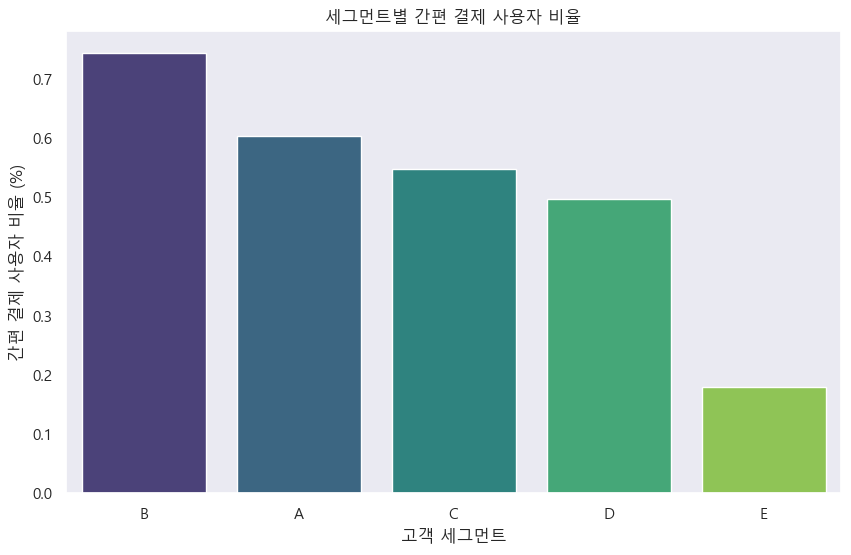

In [23]:
# 1. 세그먼트별 간편 결제 사용자 비용 분석
segment_pay_user_ratio = df1.groupby('Segment')['페이이용자'].mean().sort_values(ascending=False)
print(segment_pay_user_ratio)

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_pay_user_ratio.index, y=segment_pay_user_ratio.values, palette='viridis')
plt.title('세그먼트별 간편 결제 사용자 비율')
plt.xlabel('고객 세그먼트') 
plt.ylabel('간편 결제 사용자 비율 (%)')
plt.grid(axis='y')
plt.show()


세그먼트별 간편 결제 이용금액 평균 성장률 (B0M vs R3M 월평균):
Segment
E    0.017076
D    0.004598
C   -0.008140
B   -0.019693
A   -0.029924
Name: 페이이용금액_성장률, dtype: float64


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\90352474.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth_rate_by_segment.index, y=growth_rate_by_segment.values, palette='viridis')


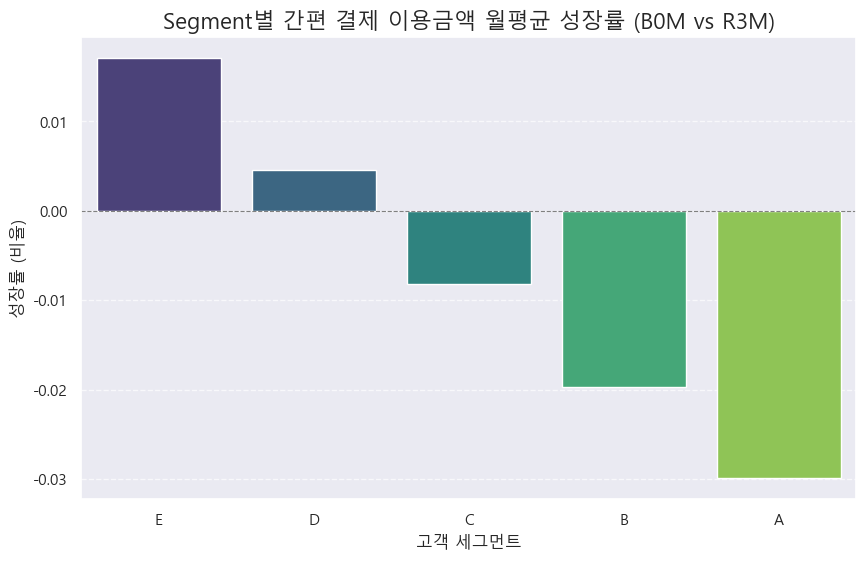

In [24]:
valid_growth_df = df1[df1['페이이용금액_월평균_R3M'] > 0].copy()

if not valid_growth_df.empty:
    growth_rate_by_segment = valid_growth_df.groupby('Segment')['페이이용금액_성장률'].mean().sort_values(ascending=False)

    print("\n세그먼트별 간편 결제 이용금액 평균 성장률 (B0M vs R3M 월평균):")
    print(growth_rate_by_segment)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=growth_rate_by_segment.index, y=growth_rate_by_segment.values, palette='viridis')
    plt.title('Segment별 간편 결제 이용금액 월평균 성장률 (B0M vs R3M)', fontsize=16)
    plt.xlabel('고객 세그먼트', fontsize=12)
    plt.ylabel('성장률 (비율)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # 0 기준선 추가
    plt.show()
else:
    print("성장률을 계산할 수 있는 페이 이용 데이터가 충분하지 않습니다 (과거 이용 금액이 없는 경우).")

In [25]:
df1.columns

Index(['ID', 'Segment', '남녀구분코드', '연령', '거주시도명', '기준년월', '이용금액_페이_온라인_B0M',
       '이용금액_페이_오프라인_B0M', '이용건수_페이_온라인_B0M', '이용건수_페이_오프라인_B0M',
       '이용금액_페이_온라인_R3M', '이용금액_페이_오프라인_R3M', '이용건수_페이_온라인_R3M',
       '이용건수_페이_오프라인_R3M', '이용금액_온라인_B0M', '이용금액_오프라인_B0M', '쇼핑_온라인_이용금액',
       '총페이이용금액', '페이이용자', '온라인페이이용비중', '온라인소비량', '온라인소비비율', '총페이이용금액_R3M',
       '페이이용금액_월평균_R3M', '페이이용금액_성장률'],
      dtype='object')

- 사용자 비율: Segment B (74.3%) > A (60.4%) > C (54.7%) > D (49.7%) > E (18.0%) 
- 성장률: Segment E (1.7%) > D (0.46%) > C (-0.8%) > B (-1.9%) > A (-2.9%) 순으로 E가 유일하게 유의미한 양(+)의 성장을 보이고 있고, 나머지 세그먼트는 대체로 감소하거나 정체된 모습
- 이 두 지표를 조합하면, 예를 들어 Segment B는 이미 간편 결제를 많이 사용하는 '성숙' 세그먼트이지만, 성장률은 정체되거나 감소하는 경향을 보이는 반면, Segment E는 사용자 비율은 낮지만 가장 높은 성장률을 보이는 '잠재 성장' 세그먼트임을 짐작할 수 있습니다.

         오프라인 소비 비중  온라인 소비 비중
Segment                       
A          0.865219   0.134781
B          0.802199   0.197801
C          0.872906   0.127094
D          0.888104   0.111896
E          0.901015   0.098985


<Figure size 1000x600 with 0 Axes>

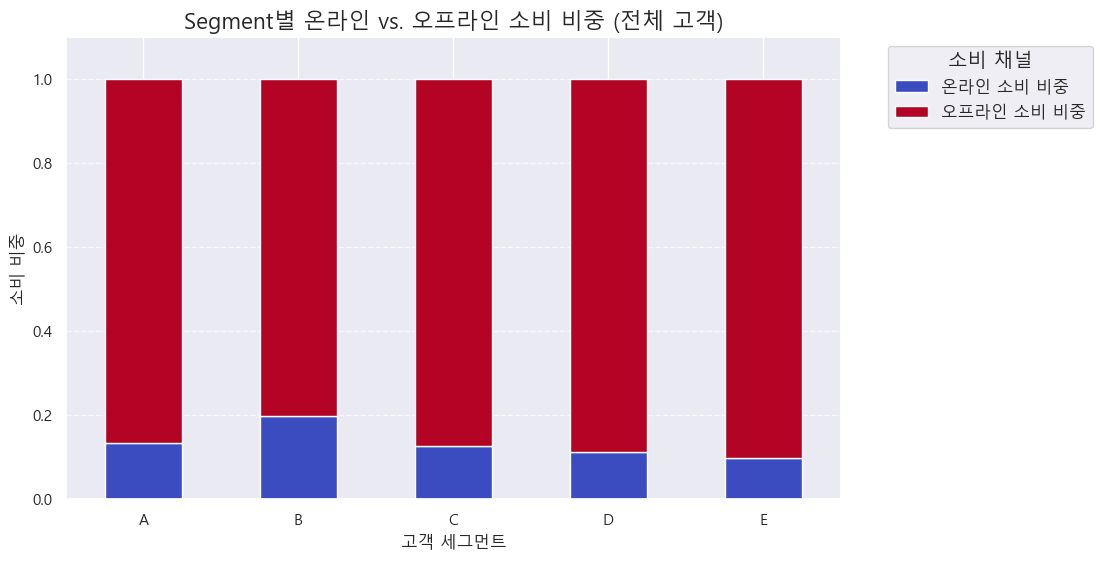

In [26]:
# 각 Segment별 온라인/오프라인 총 이용금액 합계
segment_total_consumption = df1.groupby('Segment')[['이용금액_온라인_B0M', '이용금액_오프라인_B0M']].sum()

# 전체 소비 금액 대비 비중 계산
segment_total_consumption['총 소비금액'] = segment_total_consumption['이용금액_온라인_B0M'] + segment_total_consumption['이용금액_오프라인_B0M']
segment_total_consumption['온라인 소비 비중'] = segment_total_consumption['이용금액_온라인_B0M'] / (segment_total_consumption['총 소비금액'] + 1e-10)
segment_total_consumption['오프라인 소비 비중'] = segment_total_consumption['이용금액_오프라인_B0M'] / (segment_total_consumption['총 소비금액'] + 1e-10)
print(segment_total_consumption[['오프라인 소비 비중', '온라인 소비 비중']])

plot_df_consumption = segment_total_consumption[['온라인 소비 비중', '오프라인 소비 비중']].reset_index()
plot_df_consumption_melted = plot_df_consumption.melt(id_vars=['Segment'], var_name='소비 채널', value_name='비중')

if not plot_df_consumption_melted.empty:
    plt.figure(figsize=(10, 6))
    stacked_plot_df = segment_total_consumption[['온라인 소비 비중', '오프라인 소비 비중']].reset_index().set_index('Segment')
    stacked_plot_df = stacked_plot_df.fillna(0)
    stacked_plot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

    plt.title('Segment별 온라인 vs. 오프라인 소비 비중 (전체 고객)', fontsize=16)
    plt.xlabel('고객 세그먼트', fontsize=12)
    plt.ylabel('소비 비중', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 1.1) # 비중이므로 0과 1 사이로 제한
    plt.legend(title='소비 채널', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
    plt.xticks(rotation=0, ha='center')
    plt.show()
else:
    print("소비 비중을 계산할 데이터가 충분하지 않습니다.")

#### 04_분석 인사이트

1. Segment B가 온라인 소비 전환에 가장 앞서 있다.
    - Segment B는 **온라인 소비 비중이 약 19.78%**로, 다른 모든 세그먼트 중에서 가장 높습니다. 
    - 이는 Segment B 고객들이 전체 소비 활동에서 온라인 채널을 가장 적극적으로 활용하고 있음을 의미합니다. 
    - 즉, 이들은 디지털 소비 전환이 가장 많이 진척된 세그먼트라고 볼 수 있습니다.

2. Segment E는 가장 오프라인 지향적인 세그먼트입니다.
    - 반대로 Segment E는 **온라인 소비 비중이 약 9.90%**로 가장 낮으며, 오프라인 소비 비중이 90%를 넘습니다. 
    - 이는 Segment E 고객들이 여전히 오프라인 환경에서의 소비를 강하게 선호하거나, 온라인 소비에 대한 접근성/선호도가 낮다는 것을 시사합니다.

3. 대부분의 세그먼트에서 오프라인 소비가 압도적입니다.
    - Segment B를 제외한 A, C, D, E 세그먼트 모두 온라인 소비 비중이 10% 초중반에 머물고 있으며, 오프라인 소비 비중이 80% 후반에서 90% 이상을 차지합니다. 
    - 이는 전반적으로 고객들의 주된 소비 활동이 아직 오프라인에 집중되어 있음을 보여줍니다. 
    - 즉, 간편 결제 이용률과는 별개로, 많은 고객이 아직 "디지털 소비 전환"이라는 큰 그림에서는 초기 단계에 머물러 있을 가능성이 있습니다.


- Segment B (높은 온라인 소비 비중, 사용자 비율 상위, 성장률은 마이너스): 이 세그먼트는 이미 온라인 소비에 익숙하고 페이 사용자 비율도 높지만, 최근 페이 이용 금액 성장률은 감소하고 있습니다. -> 성숙한 디지털 소비층

- Segment E (낮은 온라인 소비 비중, 사용자 비율 최하위, 성장률은 유일한 양수): 이 세그먼트는 현재 온라인 소비 비중과 페이 사용자 비율이 가장 낮지만, 페이 이용 금액 성장률이 유일하게 양수를 기록하고 있습니다. 이는 아직 온라인 소비나 페이 사용이 보편화되지는 않았지만, 최근 들어 디지털 전환이 가장 활발하게 일어나고 있는 잠재력 있는 세그먼트로 해석할 수 있습니다. 

- Segment A, C, D (중간 수준의 사용자 비율, 낮은 온라인 소비 비중, 성장률은 마이너스): 이 세그먼트들은 온라인 소비 전환이 아직 미미하며, 페이 이용 성장률도 정체되어 있습니다. 

### 가설2. SE는 평균적인 고객 특성을 나타내는 기준점 세그먼트일 것이다.
- SE는 다른 고객 세그먼트들과 비교했을 때, 재무/소비 관련 지표에서 평균적인 특성을 보이는지 정량적으로 검증한다.

#### 01_데이터구성

In [27]:
h2 = [
    'ID',
    'Segment',
    '남녀구분코드',
    '연령',
    '거주시도명',
    '기준년월',
    '이용금액_일시불_B0M',
    '이용건수_신용_B0M',
    '이용금액_체크_B0M',
    '이용금액_일시불_R6M',
    '이용건수_신용_R6M',
    '이용개월수_신용_R6M',
    '이용금액_온라인_B0M',
    '이용금액_오프라인_B0M',
    '쇼핑_온라인_이용금액',
    '카드론이용금액_누적',
    '이용횟수_연체_R6M',
    '평잔_일시불_6M',
    '잔액_일시불_B0M',
    '잔액_할부_B0M',
]
df2 = data[h2].copy()
df2

,ID,Segment,남녀구분코드,연령,거주시도명,기준년월,이용금액_일시불_B0M,이용건수_신용_B0M,이용금액_체크_B0M,이용금액_일시불_R6M,이용건수_신용_R6M,이용개월수_신용_R6M,이용금액_온라인_B0M,이용금액_오프라인_B0M,쇼핑_온라인_이용금액,카드론이용금액_누적,이용횟수_연체_R6M,평잔_일시불_6M,잔액_일시불_B0M,잔액_할부_B0M
0,TRAIN_000000,D,2,40대,서울,201807,1995,11,0,8380,77,6,0,4043,0,0,1,2440,998,962
1,TRAIN_000001,E,1,30대,경기,201807,2862,13,0,19426,81,6,0,3980,272,66914,0,2677,2565,2390
2,TRAIN_000002,C,1,30대,서울,201807,5854,12,0,35136,62,6,1625,4524,6094,185269,0,9118,5312,5113
3,TRAIN_000003,D,2,40대,부산,201807,387,6,0,-7031,42,6,0,3975,0,0,0,884,730,5025
4,TRAIN_000004,E,2,40대,광주,201807,0,-2,0,957,-2,1,0,0,0,0,0,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399995,E,2,70대이상,울산,201812,0,2,2611,0,7,0,0,0,0,0,0,0,0,0
2399996,TRAIN_399996,D,2,50대,인천,201812,7663,10,0,58916,101,6,0,4676,0,149339,0,12524,3351,0
2399997,TRAIN_399997,C,1,30대,서울,201812,4545,10,0,26974,68,6,671,4516,1458,0,0,3241,2524,2960
2399998,TRAIN_399998,E,1,40대,부산,201812,0,-2,0,0,-7,0,0,0,0,0,0,0,0,0


#### 02_시각화


--- 지표: '이용금액_일시불_B0M' 평균 데이터 ---
         이용금액_일시불_B0M
Segment              
A            19907.43
B            18011.10
C            11701.74
D             7406.56
E             2340.23
Overall       3583.20




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


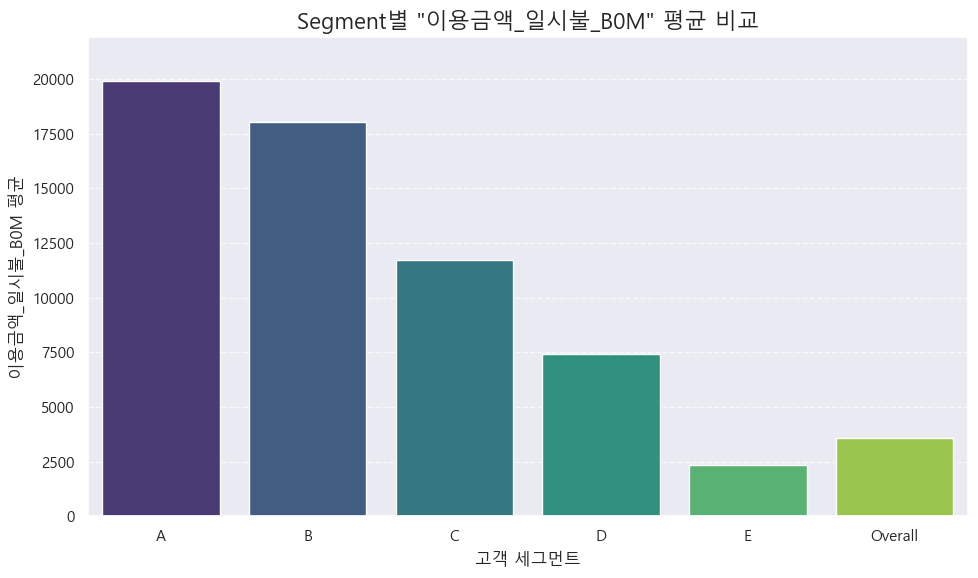




--- 지표: '이용건수_신용_B0M' 평균 데이터 ---
         이용건수_신용_B0M
Segment             
A              53.59
B              55.49
C              38.48
D              29.50
E              10.30
Overall        14.61




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


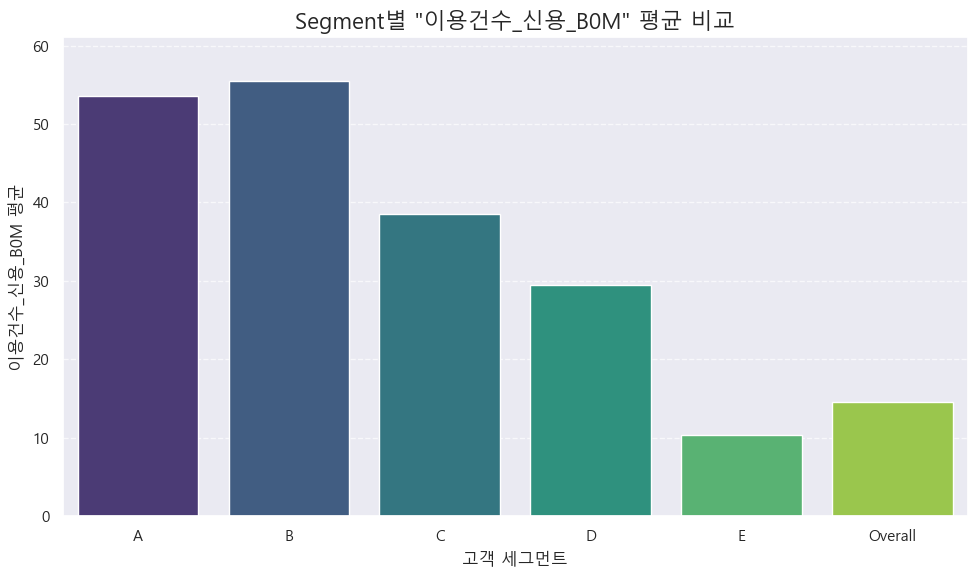

C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)





--- 지표: '이용금액_체크_B0M' 평균 데이터 ---
         이용금액_체크_B0M
Segment             
A             354.61
B            1227.83
C            1669.87
D            1408.49
E             400.46
Overall       614.66




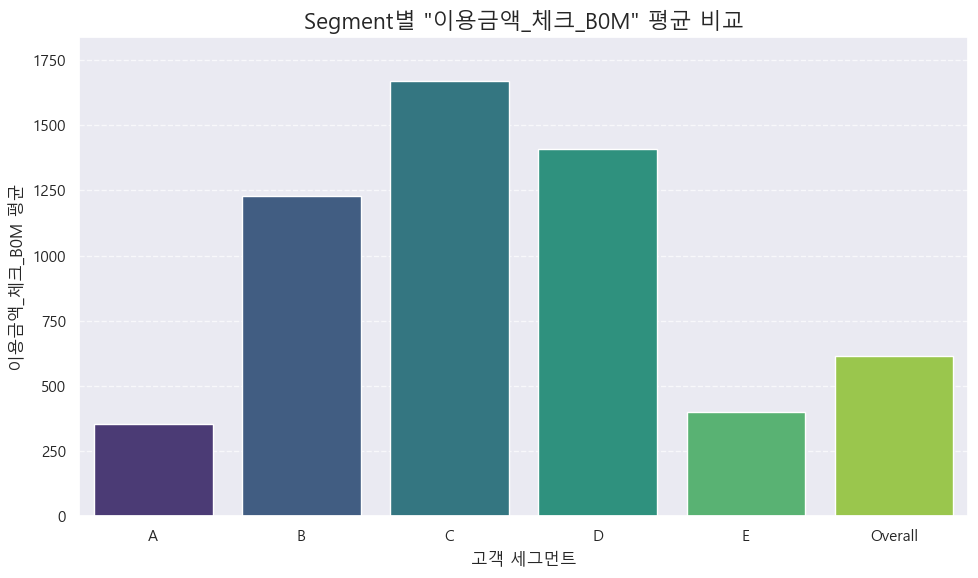




--- 지표: '이용금액_일시불_R6M' 평균 데이터 ---
         이용금액_일시불_R6M
Segment              
A           114670.54
B           104606.99
C            70802.25
D            45821.53
E            14166.86
Overall      21830.18




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


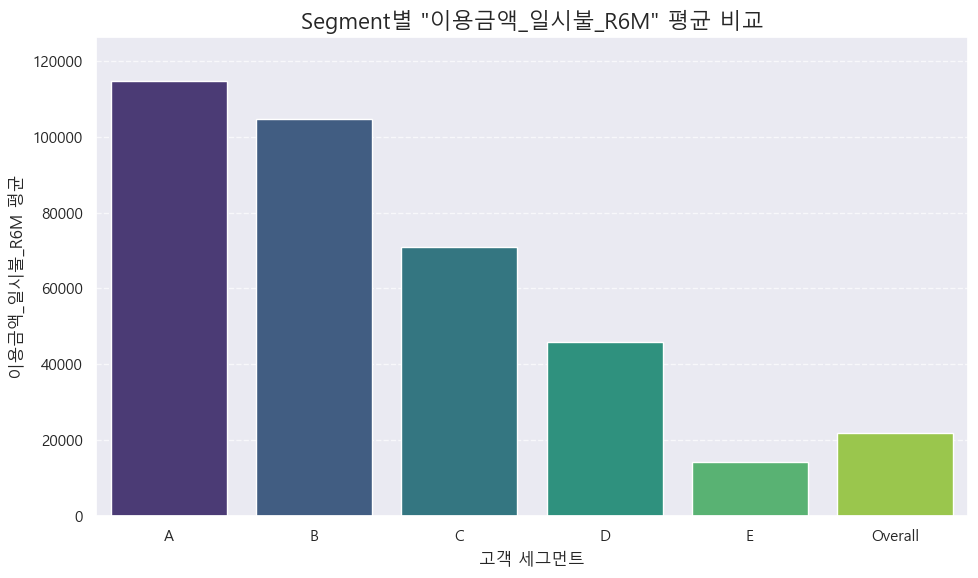




--- 지표: '이용건수_신용_R6M' 평균 데이터 ---
         이용건수_신용_R6M
Segment             
A             326.97
B             342.17
C             235.22
D             182.50
E              65.63
Overall        91.77




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


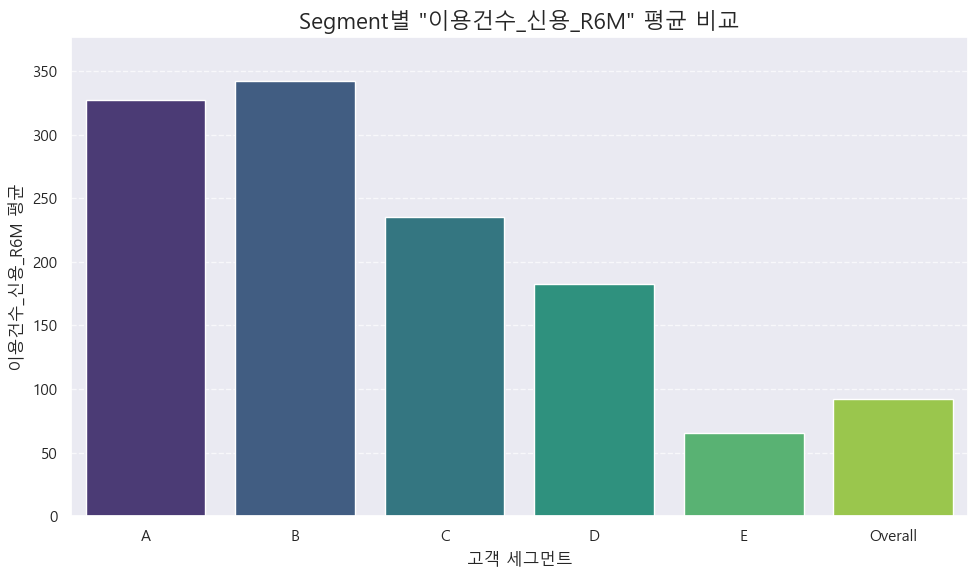




--- 지표: '이용개월수_신용_R6M' 평균 데이터 ---
         이용개월수_신용_R6M
Segment              
A                5.97
B                6.00
C                5.75
D                5.64
E                4.33
Overall          4.59




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


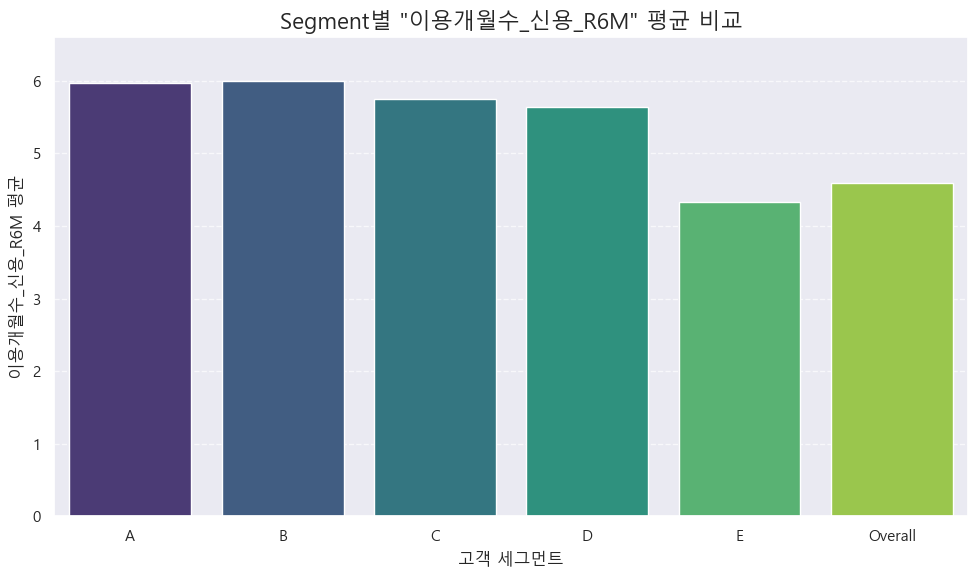




--- 지표: '이용금액_온라인_B0M' 평균 데이터 ---
         이용금액_온라인_B0M
Segment              
A             3116.95
B             4174.67
C             1523.85
D              977.58
E              254.93
Overall        428.94




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


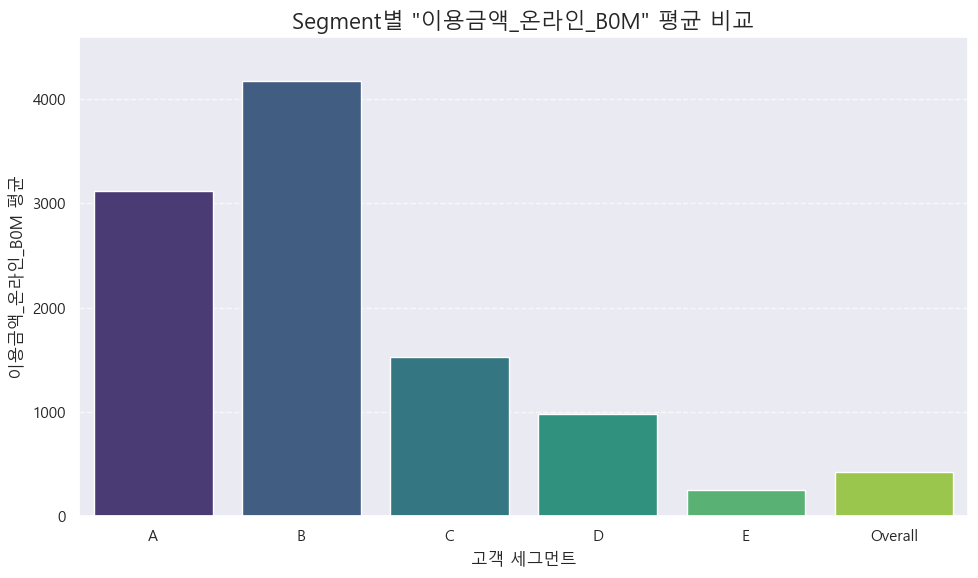




--- 지표: '이용금액_오프라인_B0M' 평균 데이터 ---
         이용금액_오프라인_B0M
Segment               
A             20009.08
B             16930.74
C             10466.11
D              7758.95
E              2320.52
Overall        3552.99




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


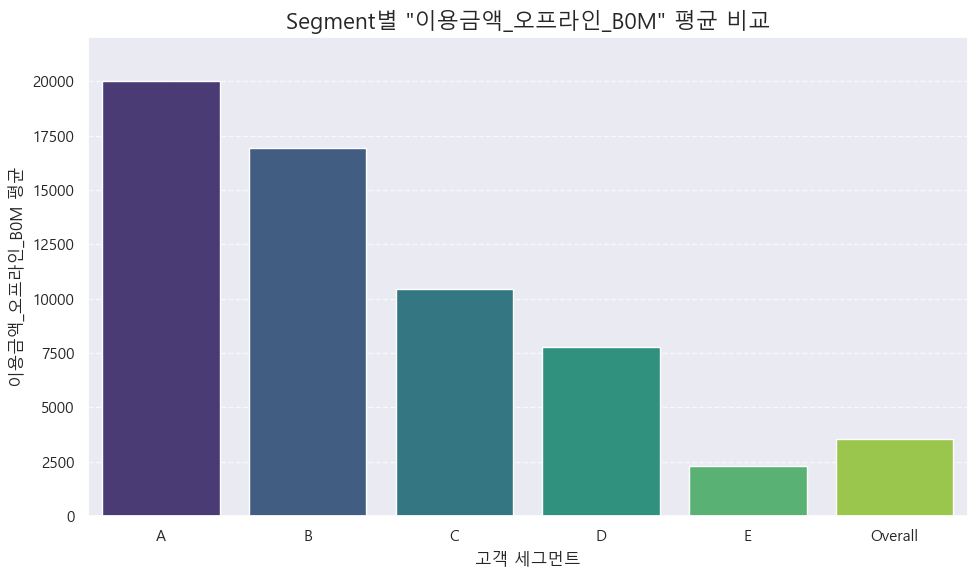




--- 지표: '쇼핑_온라인_이용금액' 평균 데이터 ---
         쇼핑_온라인_이용금액
Segment             
A           13983.23
B           18167.07
C            6344.84
D            3792.27
E             908.60
Overall      1623.56




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


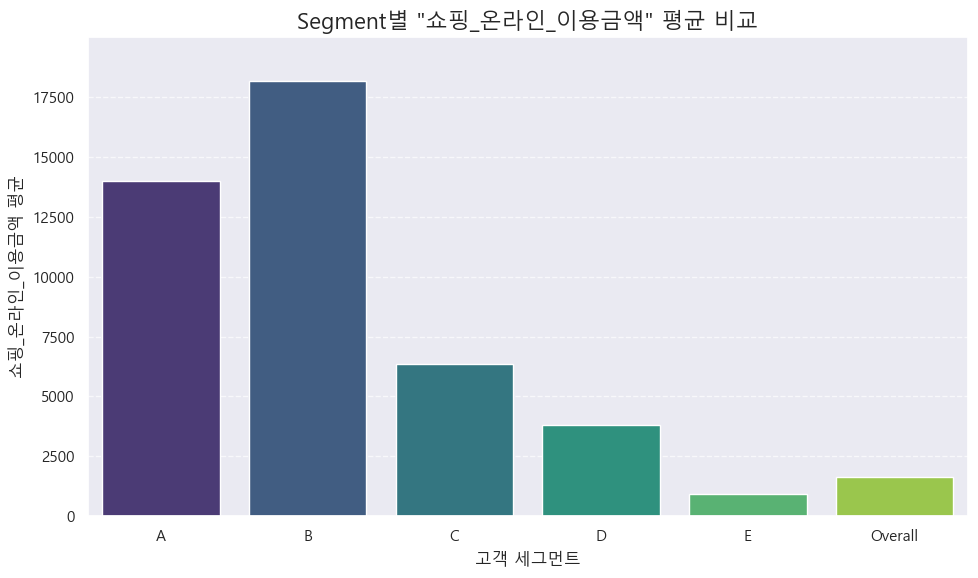




--- 지표: '카드론이용금액_누적' 평균 데이터 ---
         카드론이용금액_누적
Segment            
A         102690.16
B         123610.62
C          54510.42
D          38875.36
E          21231.41
Overall    25607.24




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


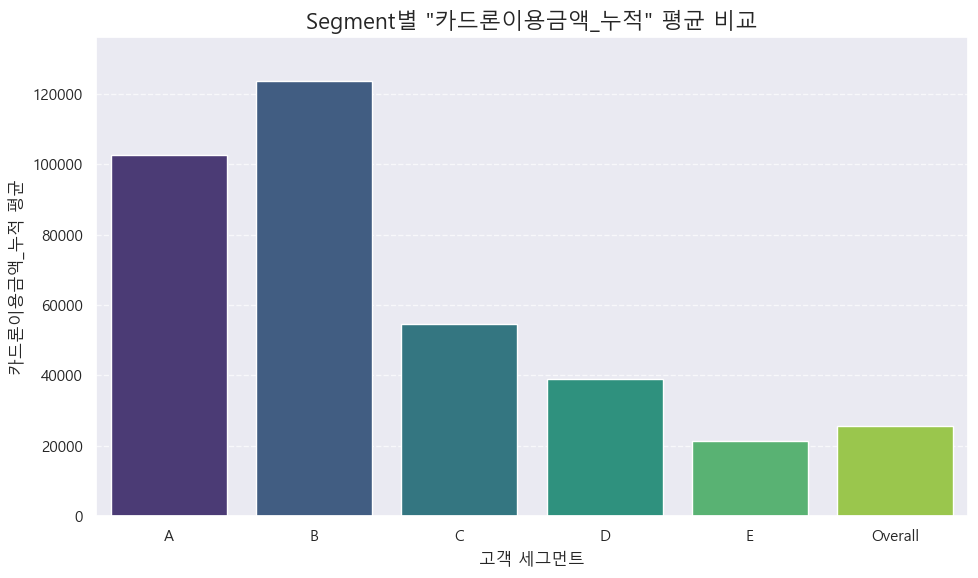




--- 지표: '이용횟수_연체_R6M' 평균 데이터 ---
         이용횟수_연체_R6M
Segment             
A               0.27
B               0.53
C               0.36
D               0.36
E               0.24
Overall         0.27




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


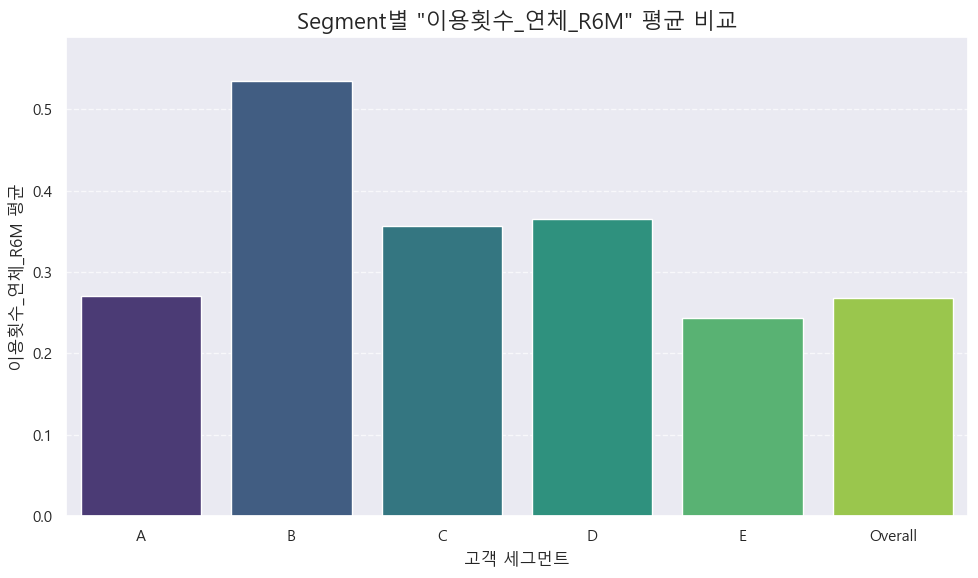




--- 지표: '평잔_일시불_6M' 평균 데이터 ---
         평잔_일시불_6M
Segment           
A         23138.44
B         16162.85
C         14118.22
D          9045.81
E          2640.09
Overall    4191.55




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


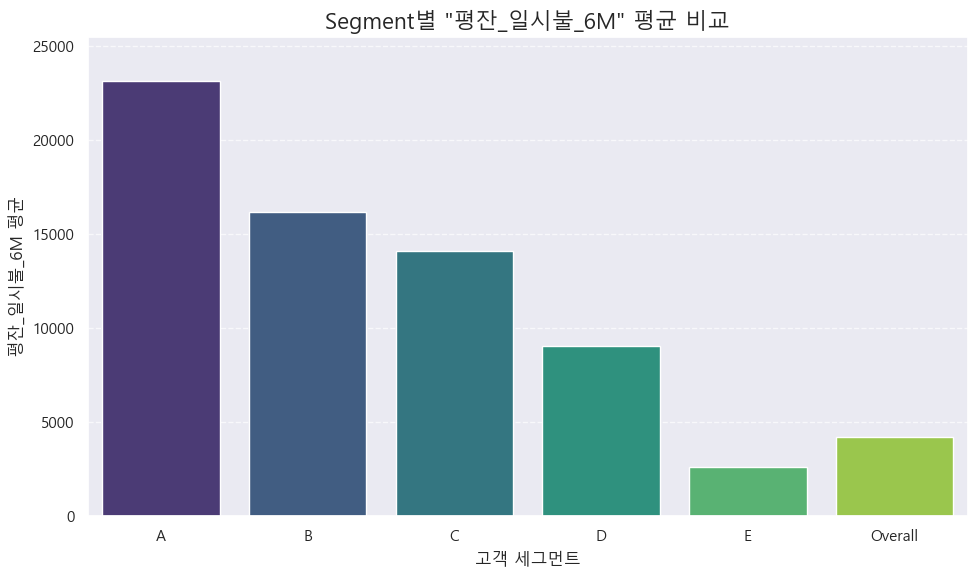




--- 지표: '잔액_일시불_B0M' 평균 데이터 ---
         잔액_일시불_B0M
Segment            
A          20699.61
B          19377.38
C          11505.37
D           7208.86
E           2039.21
Overall     3303.33




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


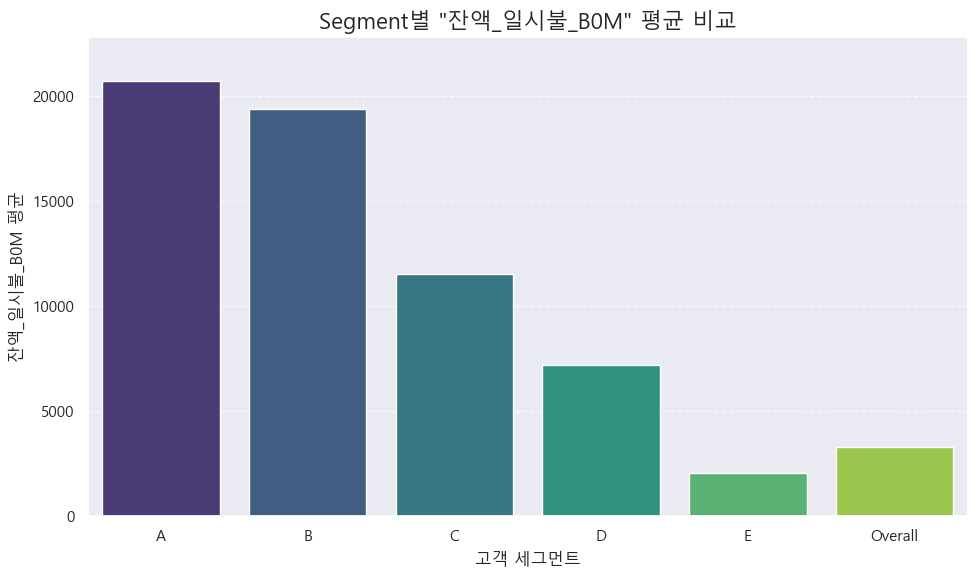




--- 지표: '잔액_할부_B0M' 평균 데이터 ---
         잔액_할부_B0M
Segment           
A         10357.12
B         15701.08
C          4030.79
D          2688.15
E          1045.07
Overall    1447.54




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\1556290904.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)


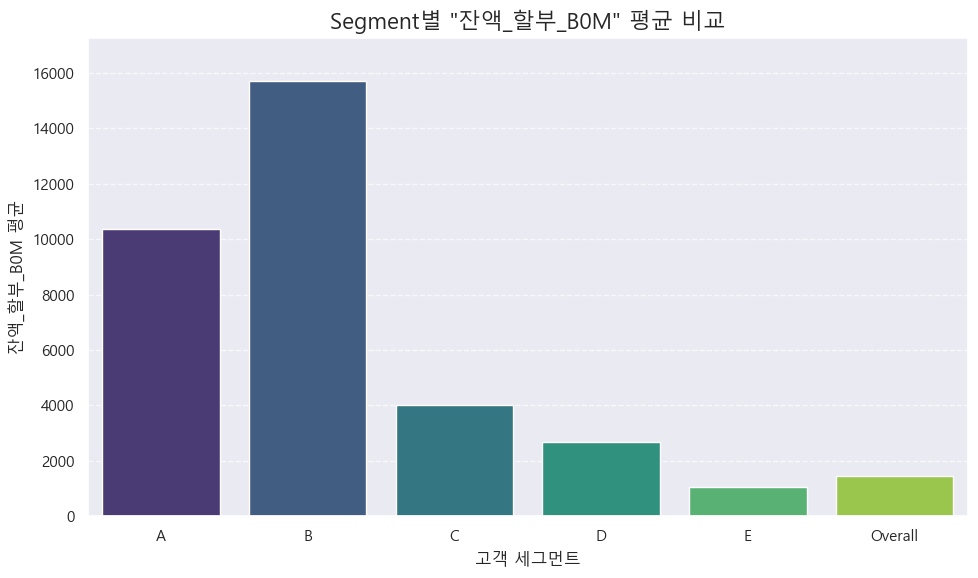

In [37]:

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# --- 분석할 지표 목록 정의 ---
metrics_to_visualize = [
    '이용금액_일시불_B0M',
    '이용건수_신용_B0M',
    '이용금액_체크_B0M',
    '이용금액_일시불_R6M',
    '이용건수_신용_R6M',
    '이용개월수_신용_R6M',
    '이용금액_온라인_B0M',
    '이용금액_오프라인_B0M',
    '쇼핑_온라인_이용금액',
    '카드론이용금액_누적',
    '이용횟수_연체_R6M',
    '평잔_일시불_6M',
    '잔액_일시불_B0M',
    '잔액_할부_B0M',
]

# df2에 실제로 존재하는 컬럼만 필터링 (명시한 컬럼이 df2에 없을 경우를 대비)
# df2는 이미 'data[h2].copy()'를 통해 생성되었다고 가정합니다.
actual_metrics = [col for col in metrics_to_visualize if col in df2.columns]

if not actual_metrics:
    print("분석할 수치형 지표가 df2에 없습니다. 컬럼 목록을 확인해주세요.")
else:
    # 모든 Segment에 대한 모든 지표의 평균을 미리 한 번만 계산합니다.
    # 이렇게 하면 반복문 안에서 매번 groupby를 다시 하지 않아 효율적입니다.
    segment_means_all = df2.groupby('Segment')[actual_metrics].mean()
    overall_means_all = df2[actual_metrics].mean()

    # 각 지표별로 숫자 출력 -> 그래프 그리기 반복
    for metric in actual_metrics:
        print(f"\n--- 지표: '{metric}' 평균 데이터 ---")

        # 1. 현재 지표에 대한 Segment별 평균 추출
        current_segment_means = segment_means_all[[metric]].copy()
        
        # 2. 현재 지표에 대한 전체 고객 평균 추출
        current_overall_mean = overall_means_all[metric]

        # 3. Segment별 평균과 전체 평균을 하나의 DataFrame으로 통합하여 출력 준비
        metric_average_df = current_segment_means.copy()
        # Series 형태의 overall_mean 값을 DataFrame에 'Overall' 인덱스로 추가
        metric_average_df.loc['Overall'] = current_overall_mean 

        # 가독성을 위해 소수점 자릿수 조정 (예: 소수점 2자리까지)
        metric_average_df_rounded = metric_average_df.round(2)
        print(metric_average_df_rounded) # 숫자 데이터 출력
        print("\n") # 가독성을 위한 줄바꿈

        # --- 해당 지표에 대한 그래프 그리기 ---
        plt.figure(figsize=(10, 6))

        # seaborn barplot을 위해 데이터를 재구성
        # reset_index()로 'Segment'를 컬럼으로 만들고, 현재 지표 컬럼명을 '평균값'으로 변경
        plot_df_for_metric = metric_average_df.reset_index().rename(columns={metric: '평균값', 'index': 'Segment'})
        
        # Segment 순서 정의: 'Overall'이 항상 마지막에 오도록 정렬
        segment_order = sorted(plot_df_for_metric['Segment'].unique().tolist(), key=lambda x: (x == 'Overall', x))

        sns.barplot(x='Segment', y='평균값', data=plot_df_for_metric, palette='viridis', order=segment_order)
        
        plt.title(f'Segment별 "{metric}" 평균 비교', fontsize=16)
        plt.xlabel('고객 세그먼트', fontsize=12)
        plt.ylabel(f'{metric} 평균', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # y축 범위 동적 설정
        min_val = plot_df_for_metric['평균값'].min()
        max_val = plot_df_for_metric['평균값'].max()
        # 음수 값이 있을 경우 0 아래로도 범위 설정
        plt.ylim(min(0, min_val * 1.1 if min_val < 0 else 0), max_val * 1.1)
        
        plt.tight_layout()
        plt.show()
        
        # 각 지표의 출력 및 그래프 사이에 구분선 추가 (선택 사항)
        if metric != actual_metrics[-1]: # 마지막 지표가 아닐 경우에만 구분선 추가
            print("\n" + "="*80 + "\n")

In [29]:

numeric_cols_for_analysis = [
    '이용금액_일시불_B0M',
    '이용건수_신용_B0M',
    '이용금액_체크_B0M',
    '이용금액_일시불_R6M',
    '이용건수_신용_R6M',
    '이용개월수_신용_R6M',
    '이용금액_온라인_B0M',
    '이용금액_오프라인_B0M',
    '쇼핑_온라인_이용금액',
    '카드론이용금액_누적',
    '이용횟수_연체_R6M',
    '평잔_일시불_6M',
    '잔액_일시불_B0M',
    '잔액_할부_B0M',
]

# df2에 실제로 존재하는 컬럼만 필터링
actual_numeric_cols = [col for col in numeric_cols_for_analysis if col in df2.columns]

if not actual_numeric_cols:
    print("분석할 수치형 지표가 df2에 없습니다. 컬럼 목록을 확인해주세요.")
else:
    # 1. 세그먼트별 주요 지표 평균 계산
    segment_means_g2 = df2.groupby('Segment')[actual_numeric_cols].mean()

    # 2. 전체 고객 주요 지표 평균 계산
    overall_means_g2 = df2[actual_numeric_cols].mean().rename('Overall_Average')

    # --- 비교 테이블 생성 및 출력 ---
    comparison_df = segment_means_g2.T 
    comparison_df['Overall_Average'] = overall_means_g2
    comparison_df = comparison_df.reindex(columns=['E'] + [col for col in comparison_df.columns if col != 'E']) # E를 첫 번째로 정렬
    
    print("\n--- 각 지표별 Segment별 평균 및 전체 평균 비교 테이블 ---")
    print(comparison_df)

    print("\n--- 테이블 출력 완료 ---")


--- 각 지표별 Segment별 평균 및 전체 평균 비교 테이블 ---
Segment                   E              A              B             C  \
이용금액_일시불_B0M    2340.228270   19907.425926   18011.104167  11701.737401   
이용건수_신용_B0M       10.299959      53.594650      55.493056     38.483126   
이용금액_체크_B0M      400.463470     354.614198    1227.833333   1669.869755   
이용금액_일시불_R6M   14166.861910  114670.542181  104606.986111  70802.250498   
이용건수_신용_R6M       65.627459     326.970165     342.173611    235.222776   
이용개월수_신용_R6M       4.326086       5.967078       6.000000      5.752151   
이용금액_온라인_B0M     254.932346    3116.948560    4174.666667   1523.846163   
이용금액_오프라인_B0M   2320.519979   20009.078189   16930.743056  10466.114907   
쇼핑_온라인_이용금액      908.597410   13983.230453   18167.069444   6344.841241   
카드론이용금액_누적     21231.413083  102690.160494  123610.625000  54510.420456   
이용횟수_연체_R6M        0.244168       0.270576       0.534722      0.356964   
평잔_일시불_6M       2640.088545   23138.444444   16162.847222 


--- 지표: '이용금액_일시불_B0M' 중앙값 데이터 ---
         이용금액_일시불_B0M
Segment              
A             22573.0
B             21517.0
C             11371.5
D              6661.0
E              1444.0
Overall        2173.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


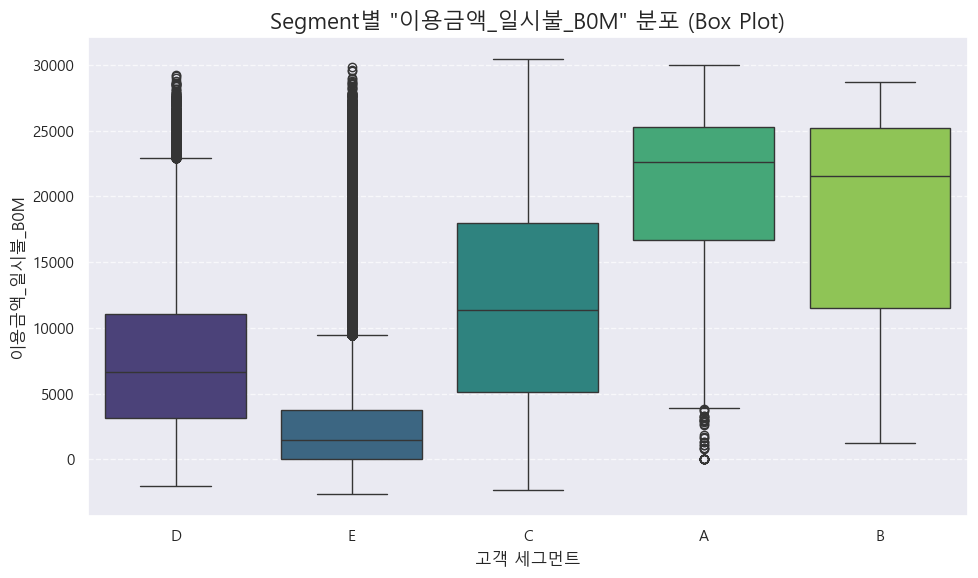




--- 지표: '이용건수_신용_B0M' 중앙값 데이터 ---
         이용건수_신용_B0M
Segment             
A               61.0
B               62.5
C               36.0
D               25.0
E                4.0
Overall          6.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


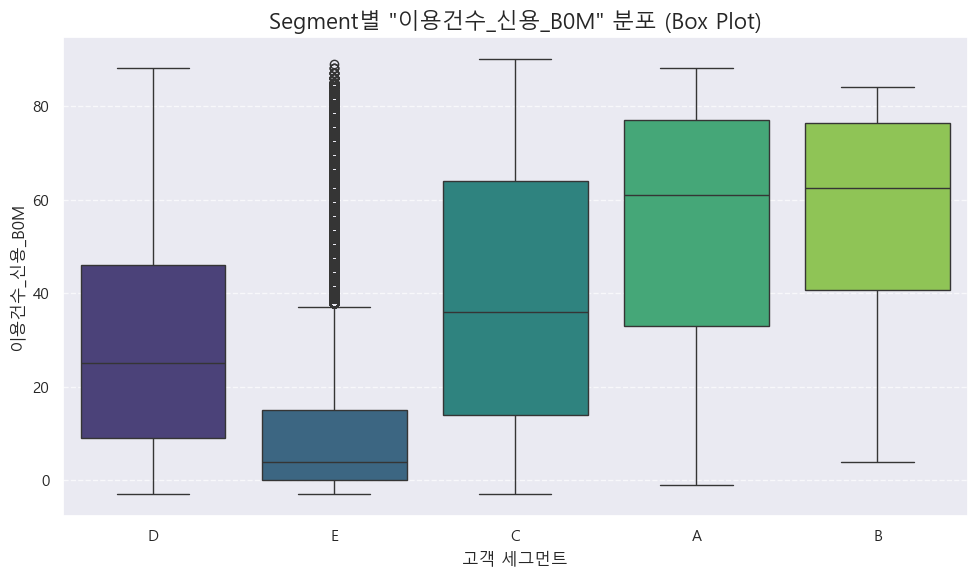




--- 지표: '이용금액_체크_B0M' 중앙값 데이터 ---
         이용금액_체크_B0M
Segment             
A                0.0
B                0.0
C                0.0
D                0.0
E                0.0
Overall          0.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


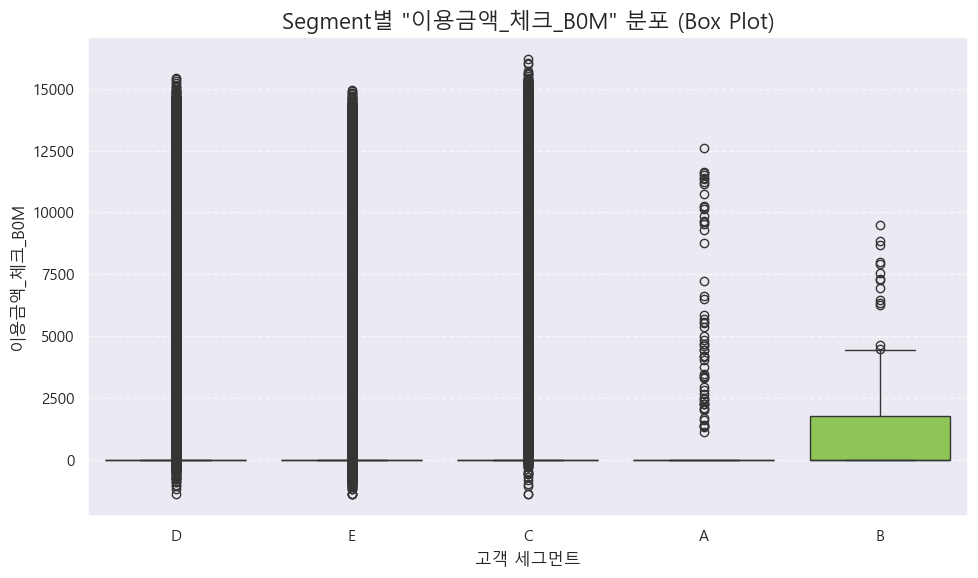




--- 지표: '이용금액_일시불_R6M' 중앙값 데이터 ---
         이용금액_일시불_R6M
Segment              
A            130104.0
B            125739.5
C             73138.5
D             41546.5
E              7585.0
Overall       12068.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


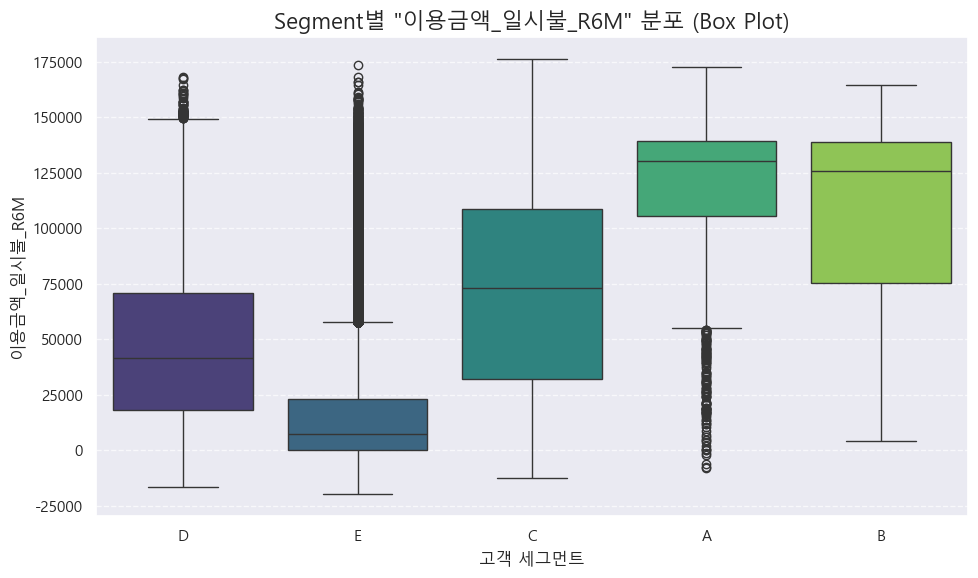




--- 지표: '이용건수_신용_R6M' 중앙값 데이터 ---
         이용건수_신용_R6M
Segment             
A              365.5
B              392.0
C              222.0
D              157.0
E               25.0
Overall         40.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


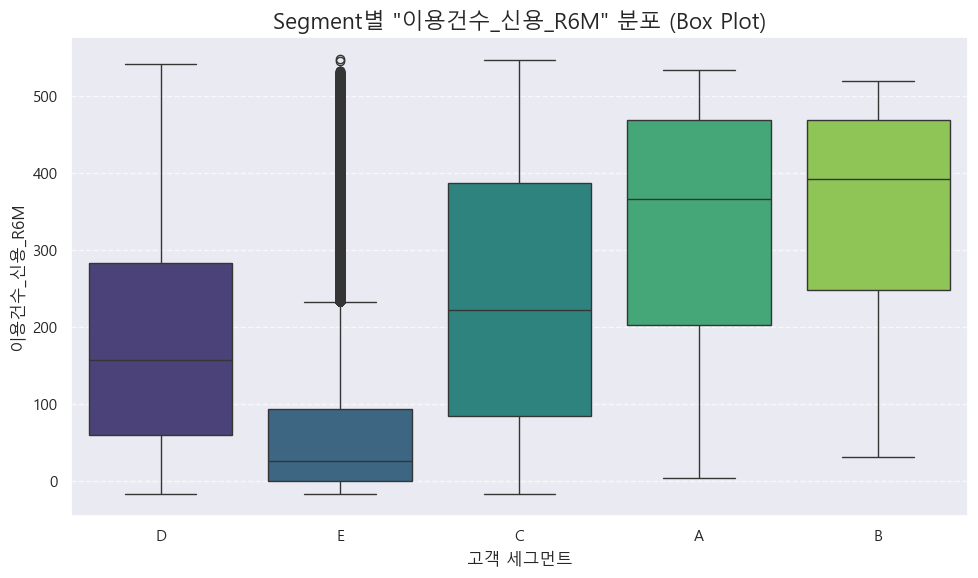




--- 지표: '이용개월수_신용_R6M' 중앙값 데이터 ---
         이용개월수_신용_R6M
Segment              
A                 6.0
B                 6.0
C                 6.0
D                 6.0
E                 6.0
Overall           6.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


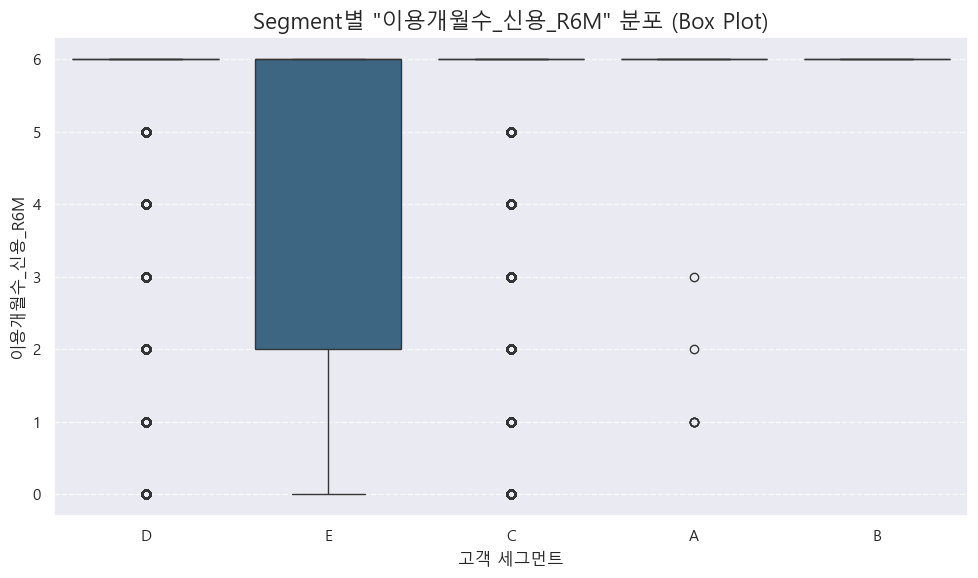




--- 지표: '이용금액_온라인_B0M' 중앙값 데이터 ---
         이용금액_온라인_B0M
Segment              
A              2266.0
B              3478.5
C               972.0
D               611.0
E                 0.0
Overall           0.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


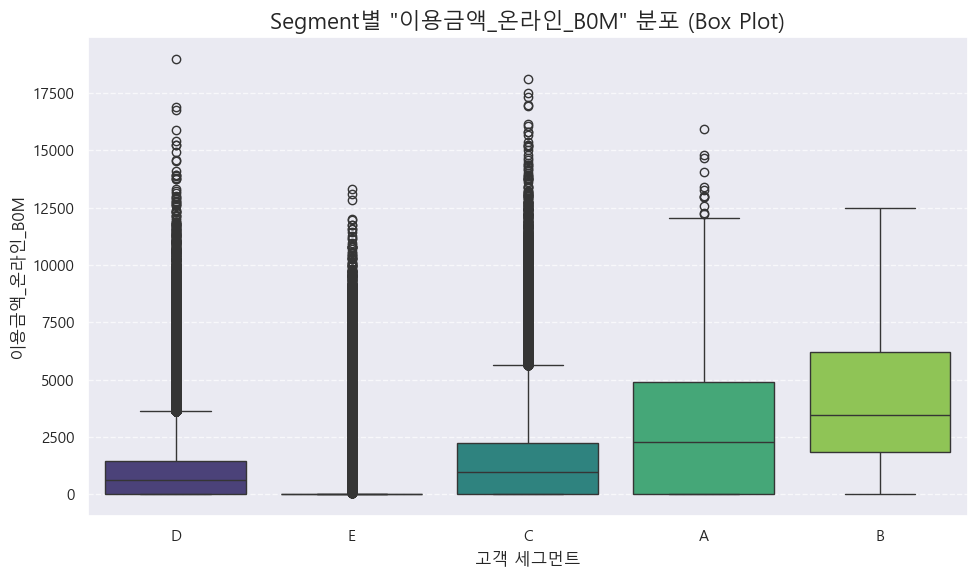




--- 지표: '이용금액_오프라인_B0M' 중앙값 데이터 ---
         이용금액_오프라인_B0M
Segment               
A              17382.0
B              16440.0
C              11812.5
D               9818.0
E                429.0
Overall         1012.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


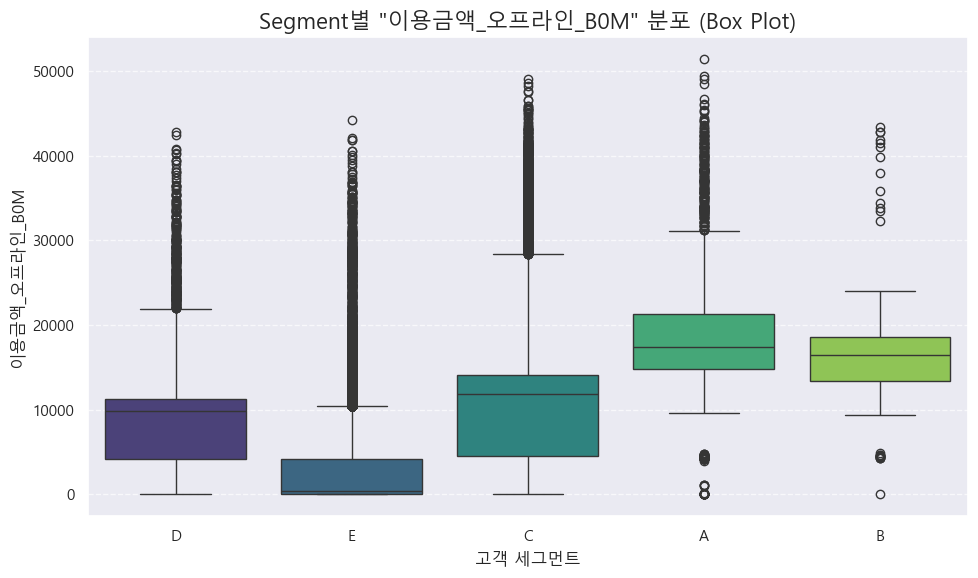




--- 지표: '쇼핑_온라인_이용금액' 중앙값 데이터 ---
         쇼핑_온라인_이용금액
Segment             
A             7510.0
B            13846.0
C             2238.0
D             1128.0
E                0.0
Overall          0.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


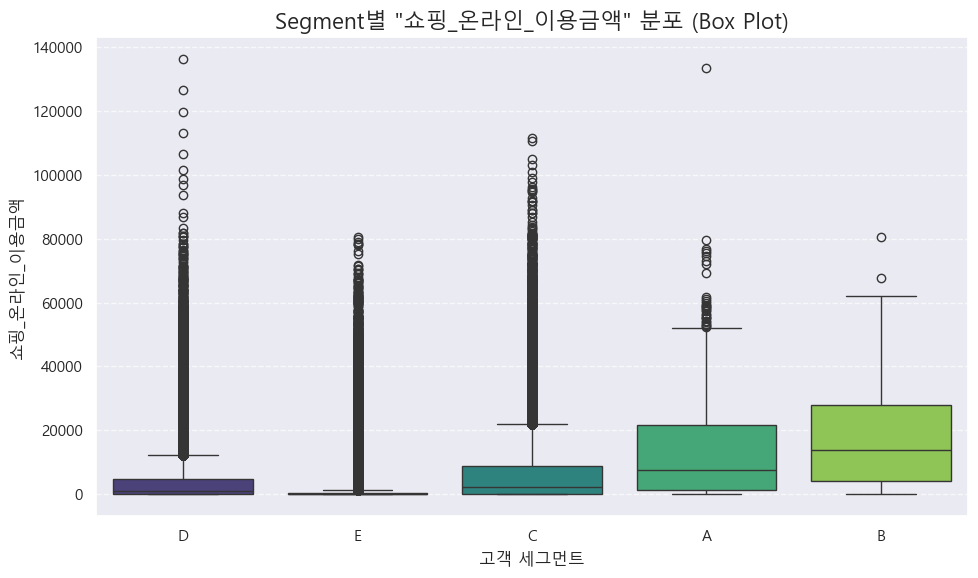




--- 지표: '카드론이용금액_누적' 중앙값 데이터 ---
         카드론이용금액_누적
Segment            
A               0.0
B           50990.0
C               0.0
D               0.0
E               0.0
Overall         0.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


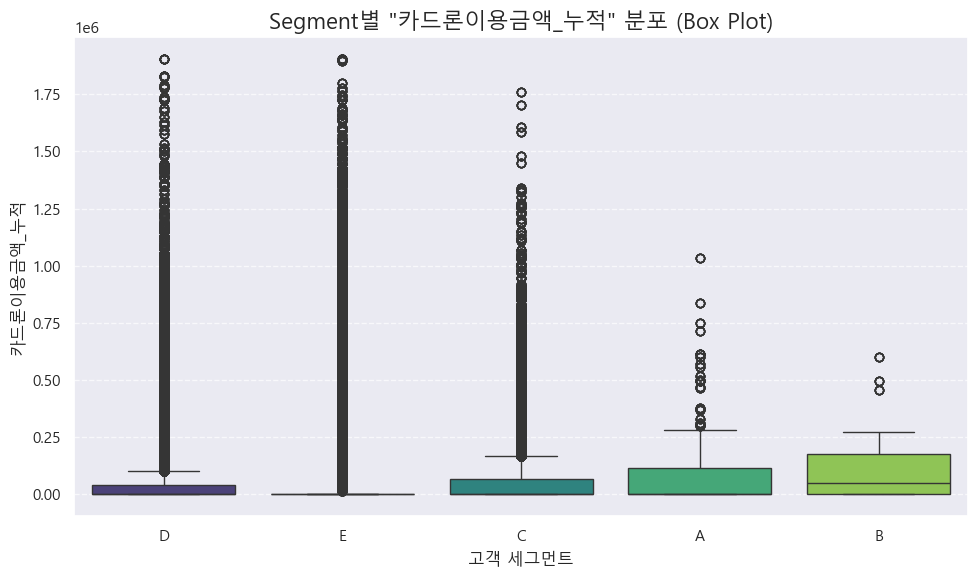




--- 지표: '이용횟수_연체_R6M' 중앙값 데이터 ---
         이용횟수_연체_R6M
Segment             
A                0.0
B                0.0
C                0.0
D                0.0
E                0.0
Overall          0.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


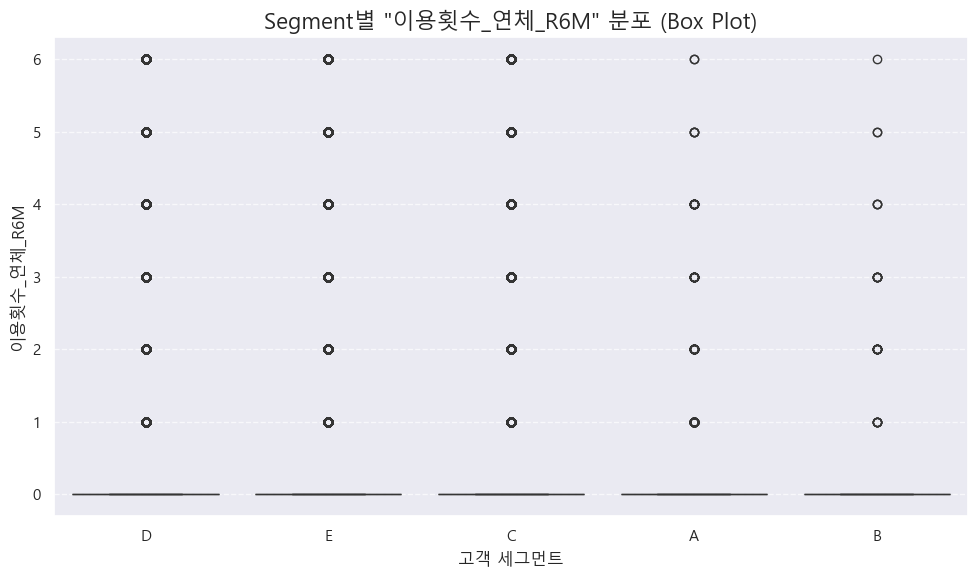




--- 지표: '평잔_일시불_6M' 중앙값 데이터 ---
         평잔_일시불_6M
Segment           
A          22736.0
B          13796.0
C          10689.0
D           6376.0
E            985.0
Overall     1704.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


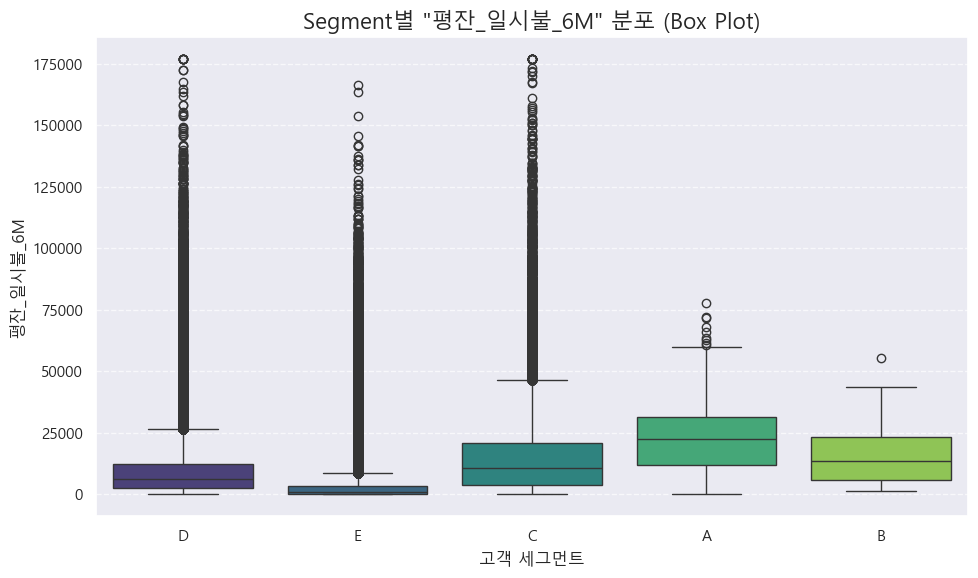




--- 지표: '잔액_일시불_B0M' 중앙값 데이터 ---
         잔액_일시불_B0M
Segment            
A           19025.0
B           15890.5
C            8019.5
D            4760.0
E             802.0
Overall      1298.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


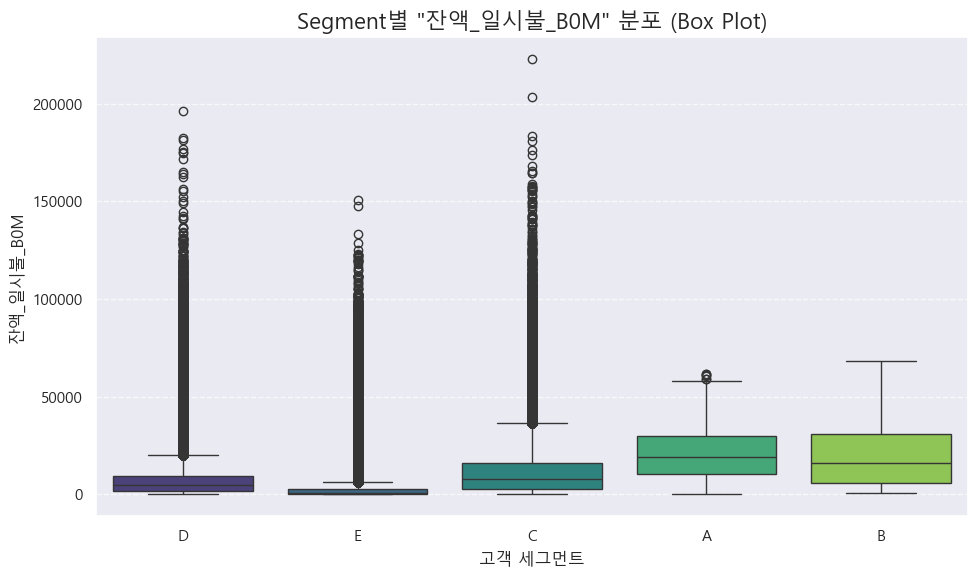




--- 지표: '잔액_할부_B0M' 중앙값 데이터 ---
         잔액_할부_B0M
Segment           
A           5750.5
B          15388.5
C           1433.5
D              0.0
E              0.0
Overall        0.0




C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_8008\522415481.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')


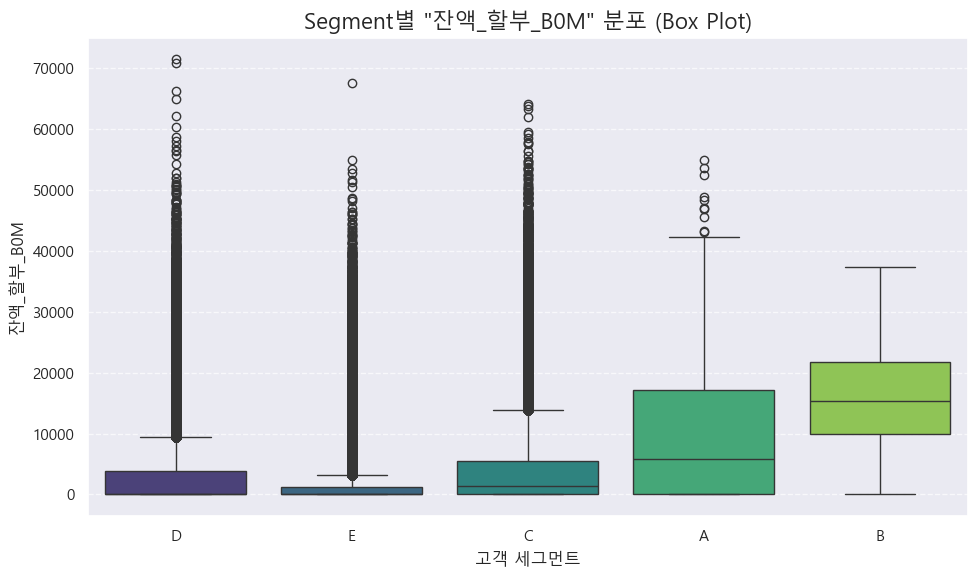

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 폰트 설정 (한글 깨짐 방지) ---
# 사용하시는 OS에 맞는 폰트 설정으로 변경해주세요.
# 예시: macOS - 'AppleGothic', Windows - 'Malgun Gothic', Linux - 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# df2는 이미 'data[h2].copy()'를 통해 생성되었다고 가정합니다.

# --- 분석할 지표 목록 정의 ---
metrics_to_visualize = [
    '이용금액_일시불_B0M',
    '이용건수_신용_B0M',
    '이용금액_체크_B0M',
    '이용금액_일시불_R6M',
    '이용건수_신용_R6M',
    '이용개월수_신용_R6M',
    '이용금액_온라인_B0M',
    '이용금액_오프라인_B0M',
    '쇼핑_온라인_이용금액',
    '카드론이용금액_누적',
    '이용횟수_연체_R6M',
    '평잔_일시불_6M',
    '잔액_일시불_B0M',
    '잔액_할부_B0M',
]

# df2에 실제로 존재하는 컬럼만 필터링 (명시한 컬럼이 df2에 없을 경우를 대비)
actual_metrics = [col for col in metrics_to_visualize if col in df2.columns]

if not actual_metrics:
    print("분석할 수치형 지표가 df2에 없습니다. 컬럼 목록을 확인해주세요.")
else:
    # 모든 Segment에 대한 모든 지표의 중앙값을 미리 한 번만 계산합니다.
    segment_medians_all = df2.groupby('Segment')[actual_metrics].median()
    overall_medians_all = df2[actual_metrics].median()

    # 각 지표별로 숫자 출력 -> Box Plot 그리기 반복
    for metric in actual_metrics:
        print(f"\n--- 지표: '{metric}' 중앙값 데이터 ---")

        # 1. 현재 지표에 대한 Segment별 중앙값 추출 (숫자 출력용)
        current_segment_medians_for_print = segment_medians_all[[metric]].copy()
        current_overall_median_for_print = overall_medians_all[metric]

        metric_median_df_for_print = current_segment_medians_for_print.copy()
        metric_median_df_for_print.loc['Overall'] = current_overall_median_for_print
        metric_median_df_rounded = metric_median_df_for_print.round(2)
        print(metric_median_df_rounded) # 숫자 데이터 출력
        print("\n") # 가독성을 위한 줄바꿈

        # --- 해당 지표에 대한 Box Plot 그리기 ---
        plt.figure(figsize=(10, 6))

        # Box Plot을 위해 'Segment'와 현재 'metric' 컬럼만 포함하는 DataFrame 준비
        # df2 원본 데이터를 사용해야 Box Plot이 데이터의 분포를 정확히 반영할 수 있습니다.
        plot_df_for_boxplot = df2[['Segment', metric]].copy()

        # Seaborn boxplot 그리기
        # x축: Segment, y축: 현재 지표의 값
        sns.boxplot(x='Segment', y=metric, data=plot_df_for_boxplot, palette='viridis')

        plt.title(f'Segment별 "{metric}" 분포 (Box Plot)', fontsize=16) # 제목 변경
        plt.xlabel('고객 세그먼트', fontsize=12)
        plt.ylabel(f'{metric}', fontsize=12) # Y축 라벨은 지표 이름만으로 충분
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # y축 범위는 Box Plot이 데이터 분포를 잘 보여줄 수 있도록 자동 설정이 더 적합할 수 있습니다.
        # 필요시 min_val, max_val 계산하여 수동 설정 가능하나, 박스플롯은 이상치를 포함하여 넓게 그릴 수 있음
        # 박스플롯의 특성상 plt.ylim을 너무 강하게 제한하면 데이터가 잘릴 수 있습니다.
        
        plt.tight_layout()
        plt.show()
        
        # 각 지표의 출력 및 그래프 사이에 구분선 추가
        if metric != actual_metrics[-1]:
            print("\n" + "="*80 + "\n")

지표별 상세 분석 및 인사이트
**소비 규모 지표 (이용금액 관련: 이용금액_일시불_B0M, 이용금액_일시불_R6M, 이용금액_온라인_B0M, 이용금액_오프라인_B0M, 쇼핑_온라인_이용금액, 평잔_일시불_6M, 잔액_일시불_B0M, 잔액_할부_B0M):**
    - Segment E는 모든 소비 규모 지표에서 전체 평균보다 현저히 낮습니다. 예를 들어, 이용금액_일시불_B0M (E: 2,340 vs Overall: 3,583), 이용금액_온라인_B0M (E: 254 vs Overall: 428), 쇼핑_온라인_이용금액 (E: 908 vs Overall: 1,623) 등 대부분의 지표에서 E의 평균값이 Overall_Average보다 작습니다.

    - 이는 Segment E가 전체 고객 평균 대비 소비력이 낮거나 지출 규모가 작은 경향이 있음을 시사합니다.

    - 다른 세그먼트(A, B, C, D)와 비교했을 때도, Segment E는 압도적으로 낮은 소비 규모를 보이며, 이들은 오히려 전체 평균보다 훨씬 높은 소비력을 가집니다. 따라서 Segment E는 소비 규모 측면에서 '평균'이 아닌 '하위' 세그먼트에 가깝습니다.

**이용 건수 지표 (이용건수_신용_B0M, 이용건수_신용_R6M):**
    - 이용건수_신용_B0M (E: 10.3 vs Overall: 14.6), 이용건수_신용_R6M (E: 65.6 vs Overall: 91.8) 모두 Segment E가 전체 평균보다 낮습니다. 이는 소비 금액과 마찬가지로 카드 이용 건수에서도 Segment E가 활발하지 않음을 나타냅니다.

    - 다른 세그먼트(A, B, C, D)는 Segment E보다 훨씬 높은 이용 건수를 보입니다.

**결제 수단 지표 (이용금액_체크_B0M, 이용금액_페이_온라인_B0M, 이용금액_페이_오프라인_B0M):**
    - 이용금액_체크_B0M (E: 400 vs Overall: 614) 또한 Segment E가 전체 평균보다 낮습니다.
    - 이용금액_페이_온라인_B0M (E: 254 vs Overall: 428) 및 이용금액_페이_오프라인_B0M (E: 2320 vs Overall: 3552)은 역시 Segment E가 전체 평균보다 낮은 수준입니다.

**재무 건전성 및 특수 지표 (카드론이용금액_누적, 이용횟수_연체_R6M, 이용개월수_신용_R6M):**
    - 카드론이용금액_누적: Segment E (21,231)는 전체 평균 (25,607)보다 약간 낮지만, Segment B (123,610)나 A (102,690)와 같은 고액 이용 세그먼트에 비하면 현저히 낮습니다. 이 지표만으로는 "평균"이라기보다는 '카드론 이용이 상대적으로 적은' 그룹으로 볼 수 있습니다.

    - 이용횟수_연체_R6M: Segment E (0.244)는 전체 평균 (0.267)과 매우 유사합니다. 다른 세그먼트들(A: 0.27, C: 0.35, D: 0.36, B: 0.53)과 비교했을 때, B가 연체 횟수가 가장 높고 E는 가장 낮은 축에 속합니다. 이 지표에서는 오히려 평균 이하의 연체율을 보여 재무적으로 '더 건전'한 편에 속할 가능성도 있습니다.

    - 이용개월수_신용_R6M: Segment E (4.326)는 전체 평균 (4.593)과 유사하며, 모든 세그먼트 중 가장 낮습니다. 이는 Segment E 고객들이 신용카드 이용 기간이 비교적 짧거나, 최근 신규 고객 유입이 많다는 것을 시사할 수 있습니다. '평균'이라기보다는 '신용카드 이용 이력이 짧은' 특성을 나타냅니다.

**종합적인 가설 2 검증 결과**
- Segment E는 대부분의 재무/소비 규모 관련 지표에서 전체 평균보다 낮습니다. 이는 이들이 '평균적인' 고객이라기보다는 '소비 규모가 작은' 또는 '신규/저활동' 고객일 가능성을 강하게 시사합니다.
- 재무 건전성 지표 (이용횟수_연체_R6M)에서는 전체 평균과 유사성을 보였고, 카드론이용금액_누적이나 이용개월수_신용_R6M에서는 전체 평균보다 낮거나 가장 낮은 경향을 보였습니다. 이는 이들이 소비 규모는 작지만, 동시에 재무적으로는 상대적으로 보수적이거나 신규 고객의 특성을 가질 수 있음을 나타냅니다.
- 따라서, "SE는 평균적인 고객 특성을 나타내는 기준점 세그먼트일 것이다."라는 가설은 대부분의 소비 규모 지표에서 기각됩니다. 오히려 Segment E는 소비 금액과 이용 건수 측면에서 다른 세그먼트 대비 현저히 낮고, 신용카드 이용 기간도 짧은 저활동/신규 고객 또는 소액 사용자 그룹으로 특징지을 수 있습니다. 연체율에서 평균에 가깝다는 점은 흥미롭지만, 이를 가지고 전체적인 평균 특성을 대표한다고 보기는 어렵습니다.
- 이 분석 결과는 가설 1에서 Segment E의 간편 결제 이용 금액 성장률이 유일하게 양수였다는 점과 결합하여 더 흥미로운 시사점을 제공합니다.
- Segment E는 현재는 소비 규모가 작고 페이 사용자 비율도 낮지만, 페이 사용액이 유일하게 성장하고 있는 세그먼트입니다. 즉, 이들은 현재의 '평균'은 아니지만, 미래의 '성장 동력'이 될 수 있는 잠재 고객으로 볼 수 있습니다. 오프라인 소비에 익숙하고 기존 디지털 소비 경험이 적은 이들이 점차 페이를 통해 온라인/디지털 소비로 전환되고 있을 가능성이 높습니다.

In [30]:
data.columns

Index(['ID', 'Segment', '남녀구분코드', '연령', '거주시도명', '기준년월', '이용금액_페이_온라인_B0M',
       '이용금액_페이_오프라인_B0M', '이용건수_페이_온라인_B0M', '이용건수_페이_오프라인_B0M',
       '이용금액_페이_온라인_R3M', '이용금액_페이_오프라인_R3M', '이용건수_페이_온라인_R3M',
       '이용건수_페이_오프라인_R3M', '이용금액_일시불_B0M', '이용건수_신용_B0M', '이용금액_체크_B0M',
       '이용금액_일시불_R6M', '이용건수_신용_R6M', '이용개월수_신용_R6M', '이용금액_온라인_B0M',
       '이용금액_오프라인_B0M', '쇼핑_온라인_이용금액', '카드론이용금액_누적', '이용횟수_연체_R6M',
       '평잔_일시불_6M', '잔액_일시불_B0M', '잔액_할부_B0M', '평잔_할부_6M'],
      dtype='object')

연령          20대     30대     40대     50대     60대  70대이상
Segment                                               
A             6      78     360     378     108     42
B             6      42      48      48       0      0
C          4134   32256   48390   29682    9888   3240
D         25986  102258  115800   70824   26706   7668
E        161748  457512  568548  445410  210288  78546


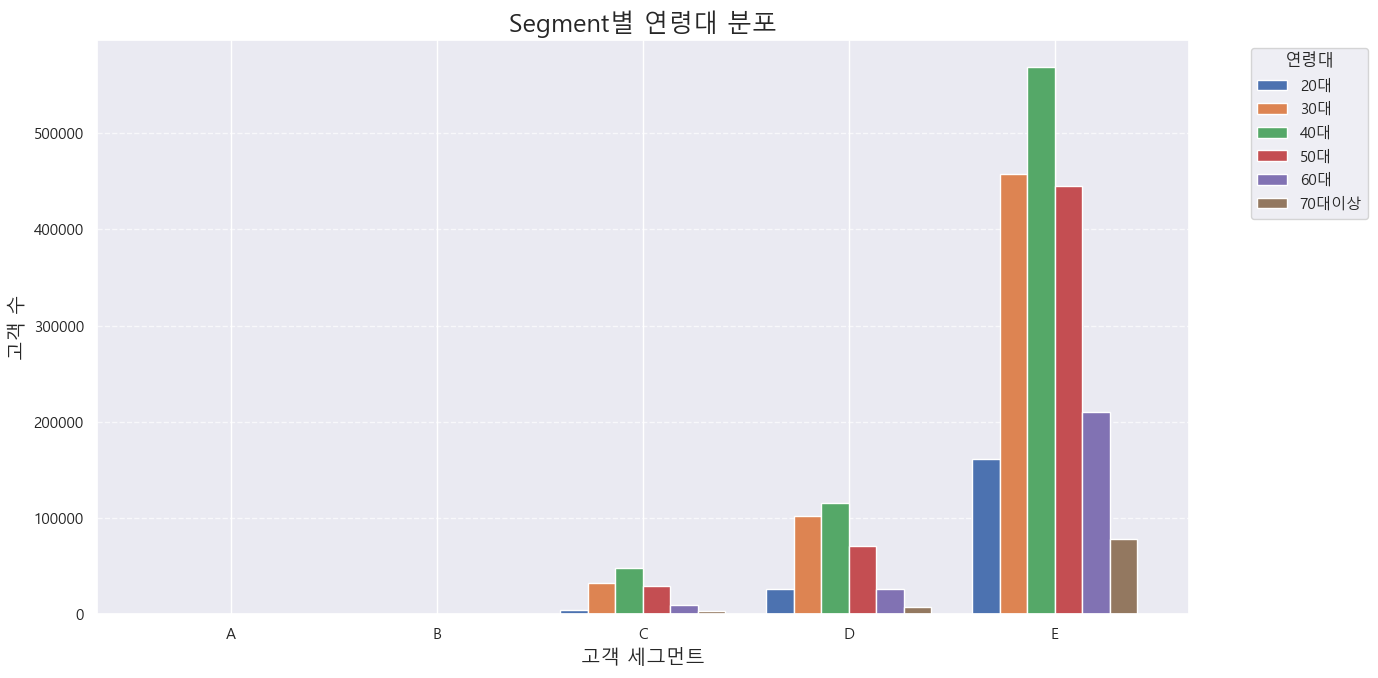

--- 원본 데이터: Segment별 연령대 고객 수 ---
            20대     30대     40대     50대     60대  70대이상
Segment                                               
A             6      78     360     378     108     42
B             6      42      48      48       0      0
C          4134   32256   48390   29682    9888   3240
D         25986  102258  115800   70824   26706   7668
E        161748  457512  568548  445410  210288  78546


--- 결과: Segment별 연령대 구성 비율 (각 세그먼트 내 총 고객 수 대비) ---
          20대   30대   40대   50대   60대  70대이상
Segment                                     
A        0.01  0.08  0.37  0.39  0.11   0.04
B        0.04  0.29  0.33  0.33  0.00   0.00
C        0.03  0.25  0.38  0.23  0.08   0.03
D        0.07  0.29  0.33  0.20  0.08   0.02
E        0.08  0.24  0.30  0.23  0.11   0.04




In [35]:
age_distribution = pd.crosstab(data['Segment'], data['연령'])
print(age_distribution)

age_distribution.plot(kind='bar', figsize=(14, 7), width=0.8) # 막대 폭 조정
plt.title('Segment별 연령대 분포', fontsize=18)
plt.xlabel('고객 세그먼트', fontsize=14)
plt.ylabel('고객 수', fontsize=14)
plt.xticks(rotation=0) # x축 라벨 회전 방지
plt.legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 위치 조정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

age_distribution_counts_data = {
    '20대': [6, 6, 4134, 25986, 161748],
    '30대': [78, 42, 32256, 102258, 457512],
    '40대': [360, 48, 48390, 115800, 568548],
    '50대': [378, 48, 29682, 70824, 445410],
    '60대': [108, 0, 9888, 26706, 210288],
    '70대이상': [42, 0, 3240, 7668, 78546]
}
segments = ['A', 'B', 'C', 'D', 'E']
age_distribution_counts = pd.DataFrame(age_distribution_counts_data, index=pd.Index(segments, name='Segment'))

# 연령대 컬럼의 순서를 정의 (출력 가독성을 위해)
age_order_categories = ['20대', '30대', '40대', '50대', '60대', '70대이상']
age_distribution_counts = age_distribution_counts[age_order_categories]

print("--- 원본 데이터: Segment별 연령대 고객 수 ---")
print(age_distribution_counts)
print("\n")

# --- 2. 각 Segment 내 연령대 비율 계산 ---
# 각 Segment별 총 고객 수 (비율 계산을 위한 분모)
# 각 행의 합계를 계산합니다.
segment_total_customers = age_distribution_counts.sum(axis=1)

# 비율 계산 (ZeroDivisionError 방지)
# age_distribution_counts의 각 셀을 해당 Segment의 총 고객 수로 나눕니다.
age_distribution_proportions = age_distribution_counts.divide(
    np.where(segment_total_customers == 0, 1, segment_total_customers), # 분모가 0인 경우 1로 처리하여 0 나누기 방지
    axis=0 # 행 방향으로 나눔 (각 세그먼트별로)
)

# 출력 가독성을 위해 소수점 두 자리까지 반올림
age_distribution_proportions = age_distribution_proportions.round(2) # 소수점 넷째 자리까지 표시 (예: 0.1234)


print("--- 결과: Segment별 연령대 구성 비율 (각 세그먼트 내 총 고객 수 대비) ---")
print(age_distribution_proportions)
print("\n")

In [32]:
print(pd.crosstab(data['Segment'], data['남녀구분코드'], normalize='index'))
print(pd.crosstab(data['Segment'], data['거주시도명'], normalize='index'))

남녀구분코드          1         2
Segment                    
A        0.709877  0.290123
B        0.541667  0.458333
C        0.614672  0.385328
D        0.567561  0.432439
E        0.508778  0.491222
거주시도명          강원        경기        경남        경북        광주        대구        대전  \
Segment                                                                         
A        0.006173  0.435185  0.018519  0.021605  0.015432  0.005144  0.026749   
B        0.000000  0.125000  0.083333  0.041667  0.000000  0.000000  0.000000   
C        0.002876  0.344181  0.027957  0.028051  0.012242  0.024822  0.052457   
D        0.004948  0.298713  0.037077  0.030203  0.013357  0.029029  0.053725   
E        0.005231  0.262381  0.041465  0.040105  0.015825  0.035055  0.061038   

거주시도명          부산        서울        세종        울산        인천        전남        전북  \
Segment                                                                         
A        0.037037  0.296296  0.000000  0.039095  0.048354  0.010288  0.003

### 3. 통계검정
- 세그먼트의 평균을 비교하고 시각화한 것은 기술통계에 불과함. 즉 데이터가 보기에 어떠한 경향을 띠는지 확인한 것
- 통계적 유의성 검정은 이러한 차이가 우연히 발생했을 가능성이 얼마나 되는가를 숫자로 보여주는 것임. 
- p-value는 이 우연히 발생할 확률을 나타내며, 일반적으로 p<0.05 일때 해당 차이가 통계적으로 유의하다고 판단함. 

In [33]:
import pandas as pd
from scipy import stats # 통계 검정을 위한 라이브러리
import numpy as np

# df DataFrame을 사용한다고 가정합니다. (예: df = df2.copy() 또는 df = data.copy())
df = data.copy() # 현재 data라는 이름의 DataFrame을 사용한다고 가정합니다.


print("--- Segment E와 전체 고객 간 주요 지표 통계적 유의성 검정 시작 ---")
print("--- [주의] 모든 데이터는 정규 분포하지 않으며, 등분산 가정도 어긋남을 전제합니다. ---")
print("--- 이에 따라 Welch's t-test (등분산성 가정 X) 및 Mann-Whitney U Test (비모수 검정)를 수행합니다. ---")

# 통계 검정할 수치형 지표들 (이전 분석에서 사용했던 지표들을 포함합니다)
metrics_to_test = [
    '이용금액_일시불_B0M',
    '이용건수_신용_B0M',
    '이용금액_체크_B0M',
    '이용금액_일시불_R6M',
    '이용건수_신용_R6M',
    '이용개월수_신용_R6M',
    '이용금액_온라인_B0M',
    '이용금액_오프라인_B0M',
    '쇼핑_온라인_이용금액',
    '카드론이용금액_누적',
    '이용횟수_연체_R6M',
    '평잔_일시불_6M',
    '잔액_일시불_B0M',
    '잔액_할부_B0M',
]

# df에 실제로 존재하는 컬럼만 필터링
actual_metrics_to_test = [col for col in metrics_to_test if col in df.columns]

if not actual_metrics_to_test:
    print("통계 검정할 수치형 지표가 df에 없습니다. 컬럼 목록을 확인해주세요.")
else:
    # 결과를 저장할 DataFrame
    results = []

    # Segment E 데이터 추출
    segment_e_data = df[df['Segment'] == 'E']

    # 전체 고객 데이터 (Segment E와의 비교 대상)
    overall_data = df.copy()

    print(f"\n--- 유의수준 (alpha): 0.05 ---")
    
    for metric in actual_metrics_to_test:
        # Segment E의 데이터
        sample_e = segment_e_data[metric].dropna() # 결측치 제거
        # 전체 고객의 데이터
        sample_overall = overall_data[metric].dropna() # 결측치 제거

        # 두 샘플의 데이터가 충분히 많아야 검정이 유의미합니다.
        if len(sample_e) < 2 or len(sample_overall) < 2:
            print(f"경고: '{metric}' - 샘플 크기가 작아 검정 수행 불가 (Segment E: {len(sample_e)}, Overall: {len(sample_overall)})")
            results.append({
                '지표': metric,
                'Segment E 평균': sample_e.mean() if len(sample_e) > 0 else np.nan,
                '전체 평균': sample_overall.mean() if len(sample_overall) > 0 else np.nan,
                'Segment E 중앙값': sample_e.median() if len(sample_e) > 0 else np.nan,
                '전체 중앙값': sample_overall.median() if len(sample_overall) > 0 else np.nan,
                'Welch\'s t-statistic': np.nan,
                'Welch\'s p-value': np.nan,
                'Welch\'s 유의성 (p < 0.05)': 'N/A (샘플 부족)',
                'Mann-Whitney U statistic': np.nan,
                'Mann-Whitney U p-value': np.nan,
                'Mann-Whitney U 유의성 (p < 0.05)': 'N/A (샘플 부족)'
            })
            continue

        # 1. Welch's t-test (등분산 가정 없이)
        # equal_var=False: Welch's t-test
        stat_welch, p_value_welch = stats.ttest_ind(sample_e, sample_overall, equal_var=False)
        is_significant_welch = 'Yes' if p_value_welch < 0.05 else 'No'

        # 2. Mann-Whitney U Test (비모수 검정)
        # 이 검정은 중앙값의 차이에 더 강건합니다.
        stat_mannwhitney, p_value_mannwhitney = stats.mannwhitneyu(sample_e, sample_overall, alternative='two-sided') # 'two-sided'는 양측 검정

        is_significant_mannwhitney = 'Yes' if p_value_mannwhitney < 0.05 else 'No'

        results.append({
            '지표': metric,
            'Segment E 평균': sample_e.mean(),
            '전체 평균': sample_overall.mean(),
            'Segment E 중앙값': sample_e.median(),
            '전체 중앙값': sample_overall.median(),
            'Welch\'s t-statistic': stat_welch,
            'Welch\'s p-value': p_value_welch,
            'Welch\'s 유의성 (p < 0.05)': is_significant_welch,
            'Mann-Whitney U statistic': stat_mannwhitney,
            'Mann-Whitney U p-value': p_value_mannwhitney,
            'Mann-Whitney U 유의성 (p < 0.05)': is_significant_mannwhitney
        })

    results_df = pd.DataFrame(results)
    
    # p-value 기준으로 정렬 (더 유의미한 차이부터 확인)
    results_df = results_df.sort_values(by='Welch\'s p-value', ascending=True).reset_index(drop=True)

    print("\n--- Segment E vs. 전체 고객 통계적 검정 결과 ---")
    print(results_df)

    print("\n--- 통계적 유의성 검정 완료 ---")

--- Segment E와 전체 고객 간 주요 지표 통계적 유의성 검정 시작 ---
--- [주의] 모든 데이터는 정규 분포하지 않으며, 등분산 가정도 어긋남을 전제합니다. ---
--- 이에 따라 Welch's t-test (등분산성 가정 X) 및 Mann-Whitney U Test (비모수 검정)를 수행합니다. ---

--- 유의수준 (alpha): 0.05 ---

--- Segment E vs. 전체 고객 통계적 검정 결과 ---
               지표  Segment E 평균         전체 평균  Segment E 중앙값   전체 중앙값  \
0    이용금액_일시불_B0M   2340.228270   3583.204306         1444.0   2173.0   
1     이용건수_신용_B0M     10.299959     14.612542            4.0      6.0   
2     이용금액_체크_B0M    400.463470    614.664276            0.0      0.0   
3    이용금액_일시불_R6M  14166.861910  21830.178978         7585.0  12068.0   
4     이용건수_신용_R6M     65.627459     91.773415           25.0     40.0   
5    이용개월수_신용_R6M      4.326086      4.593972            6.0      6.0   
6    이용금액_온라인_B0M    254.932346    428.943356            0.0      0.0   
7   이용금액_오프라인_B0M   2320.519979   3552.987536          429.0   1012.0   
8     쇼핑_온라인_이용금액    908.597410   1623.556714            0.0      0.0   
9      카드론이용금액_누적  212

Segment E는 전체 고객과 통계적으로 유의미한 차이를 보임: "Segment E는 평균적인 고객 특성을 나타내는 기준점 세그먼트일 것이다"라는 가설은 모든 지표에서 기각

Welch's t-test (평균 차이 검정):
- 귀무가설 기각: Segment E의 평균은 전체 고객의 평균과 통계적으로 유의미한 차이가 있다.
- 해석: Segment E는 이 지표에서 '전체 평균'과는 다르다고 말할 수 있다.

Mann-Whitney U Test (중앙값/분포 차이 검정):
- 귀무가설 기각: Segment E의 중앙값 분포는 전체 고객의 중앙값 분포와 통계적으로 유의미한 차이가 있다.
- 해석: Segment E는 단순히 평균뿐만 아니라 데이터의 전반적인 분포 특성 면에서도 '전체'와는 다르다고 할 수 있다.
- Segment E는 전반적인 소비 규모 및 활동성 측면에서 전체 평균보다 낮은 특성을 가진 그룹이며, 재무 건전성 관련 지표에서도 미세하지만 통계적으로 유의미한 차이를 보임.
- Segment E는 '평균'이 아닌, 특정 특성(낮은 소비 규모, 낮은 카드론 이용, 짧은 이용 기간 또는 낮은 활동성)을 가진 별개의 중요한 세그먼트로 이해해야 함.